<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1301-1350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5490]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [5491]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

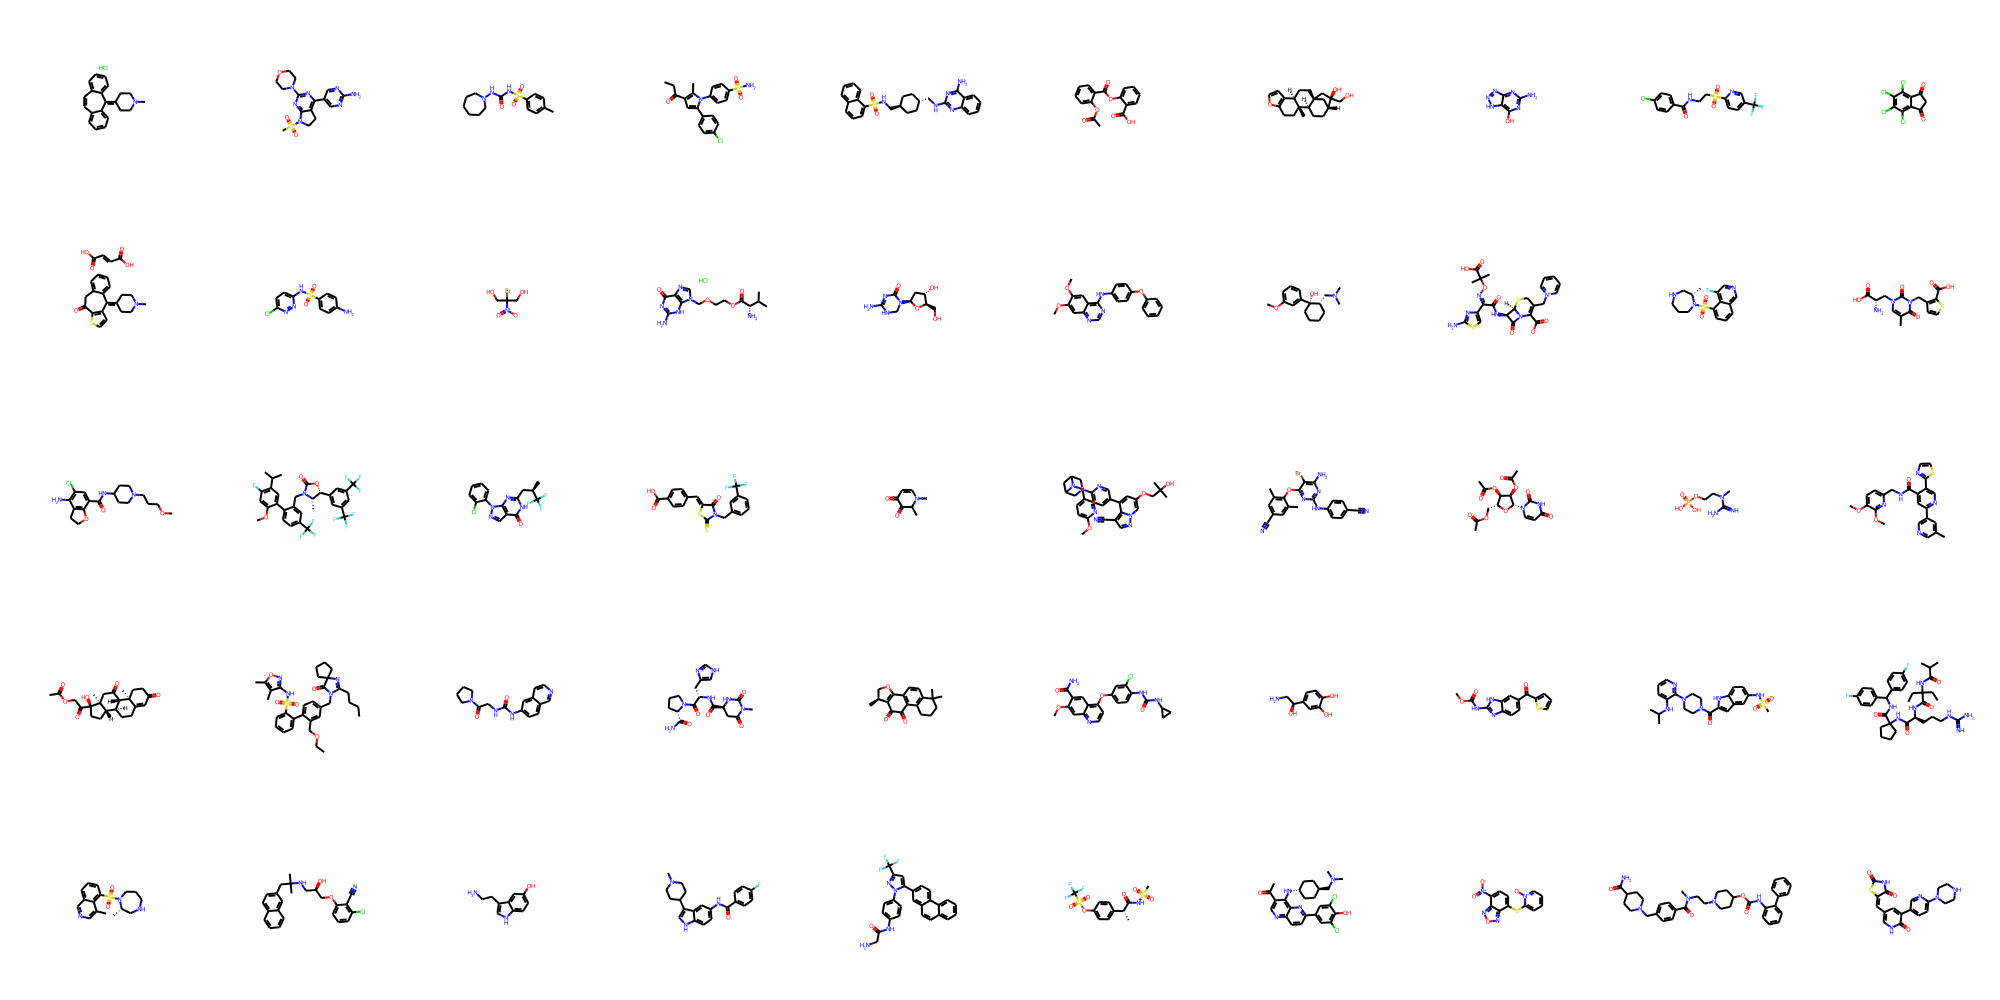

In [5492]:
smiles_list = [
               
'CN1CCC(=C2c3ccccc3C=Cc3ccccc32)CC1.Cl',
'CS(=O)(=O)N1CCc2c(-c3cnc(N)nc3)nc(N3CCOCC3)nc21',
'Cc1ccc(S(=O)(=O)NC(=O)NN2CCCCCC2)cc1',
'CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)cc2)c1C',
'Nc1nc(NC[C@H]2CC[C@H](CNS(=O)(=O)c3cccc4ccccc34)CC2)nc2ccccc12',
'CC(=O)Oc1ccccc1C(=O)Oc1ccccc1C(=O)O',
'C[C@@]12CCc3occc3[C@H]1CC[C@@]13C[C@@H](CC[C@H]12)[C@@](O)(CO)C3',
'Nc1nc(O)c2[nH]nnc2n1',
'O=C(NCCS(=O)(=O)c1ccc(C(F)(F)F)cn1)c1ccc(Cl)cc1',
'O=C1CC(=O)c2c(Cl)c(Cl)c(Cl)c(Cl)c21',
'CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1.O=C(O)/C=C/C(=O)O',
'Nc1ccc(S(=O)(=O)Nc2ccc(Cl)nn2)cc1',
'O=[N+]([O-])C(Br)(CO)CO',
'CC(C)[C@H](N)C(=O)OCCOCn1cnc2c(=O)nc(N)[nH]c21.Cl',
'NC1=NC(=O)N([C@H]2C[C@H](O)[C@@H](CO)O2)CN1',
'COc1cc2ncnc(Nc3ccc(Oc4ccccc4)cc3)c2cc1OC',
'COc1cccc([C@]2(O)CCCC[C@H]2CN(C)C)c1',
'CC(C)(O/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n+]3ccccc3)CS[C@H]12)c1csc(N)n1)C(=O)O',
'C[C@H]1CNCCCN1S(=O)(=O)c1cccc2cncc(F)c12',
'Cc1cn(C[C@H](N)C(=O)O)c(=O)n(Cc2ccsc2C(=O)O)c1=O',
'COCCCN1CCC(NC(=O)c2cc(Cl)c(N)c3c2OCC3)CC1',
'COc1cc(F)c(C(C)C)cc1-c1ccc(C(F)(F)F)cc1CN1C(=O)O[C@H](c2cc(C(F)(F)F)cc(C(F)(F)F)c2)[C@@H]1C',
'C[C@H](Cc1nc2c(cnn2-c2ccccc2Cl)c(=O)[nH]1)C(F)(F)F',
'O=C(O)c1ccc(/C=C2\SC(=S)N(Cc3cccc(C(F)(F)F)c3)C2=O)cc1',
'CC1C(=O)C(=O)C=CN1C',
'COc1ccc(CN2C3CC2CN(c2ccc(-c4cc(OCC(C)(C)O)cn5ncc(C#N)c45)cn2)C3)cn1',
'Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br',
'CC(=O)OC[C@H]1O[C@@H](n2ccc(=O)[nH]c2=O)[C@H](OC(C)=O)[C@@H]1OC(C)=O',
'CN(CCOP(=O)(O)O)C(=N)N',
'COc1ccc(CNC(=O)c2cc(-c3cncc(C)c3)ncc2-c2nccs2)nc1OC',
'CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@@]21C',
'CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2S(=O)(=O)Nc2noc(C)c2C)c(COCC)c1',
'O=C(NCC(=O)N1CCCC1)Nc1ccc2cnccc2c1',
'CN1C(=O)C[C@@H](C(=O)N[C@@H](Cc2c[nH]cn2)C(=O)N2CCC[C@H]2C(N)=O)NC1=O',
'C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C',
'COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O',
'NC[C@H](O)c1ccc(O)c(O)c1',
'COC(=O)Nc1nc2ccc(C(=O)c3cccs3)cc2[nH]1',
'CC(C)Nc1cccnc1N1CCN(C(=O)c2cc3cc(NS(C)(=O)=O)ccc3[nH]2)CC1',
'CCC(CC)(NC(=O)C(C)C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)NC1(C(=O)NC(c2ccc(F)cc2)c2ccc(F)cc2)CCCC1',
'Cc1cncc2cccc(S(=O)(=O)N3CCCNC[C@@H]3C)c12',
'CC(C)(Cc1ccc2ccccc2c1)NC[C@@H](O)COc1cccc(Cl)c1C#N',
'NCCc1c[nH]c2ccc(O)cc12',
'CN1CCC(c2c[nH]c3ccc(NC(=O)c4ccc(F)cc4)cc23)CC1',
'NCC(=O)Nc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc3c(ccc4ccccc43)c2)cc1',
'C[C@@H](C(=O)NS(C)(=O)=O)c1ccc(OS(=O)(=O)C(F)(F)F)cc1',
'CC(=O)c1cnc2ccc(-c3cc(Cl)c(O)c(Cl)c3)nc2c1N[C@H]1CC[C@H](CN(C)C)CC1',
'O=[N+]([O-])c1ccc(Sc2cccc[n+]2[O-])c2nonc12',
'CN(CCN1CCC(OC(=O)Nc2ccccc2-c2ccccc2)CC1)C(=O)c1ccc(CN2CCC(C(N)=O)CC2)cc1',
'O=C1NC(=O)/C(=C\c2c[nH]c(=O)c(-c3ccc(N4CCNCC4)nc3)c2)S1',


               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



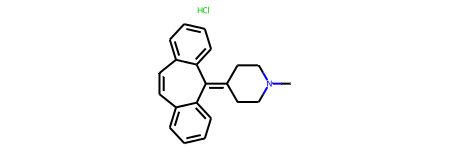

In [5493]:
M1 = mol_list [0]
M1

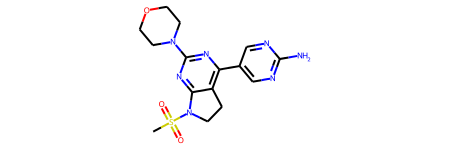

In [5494]:
M2 = mol_list [1]
M2

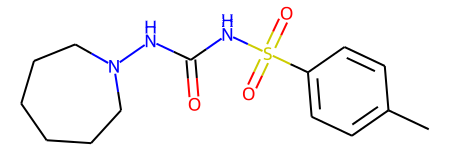

In [5495]:
M3 = mol_list [2]
M3

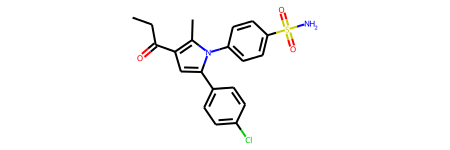

In [5496]:
M4 = mol_list [3]
M4

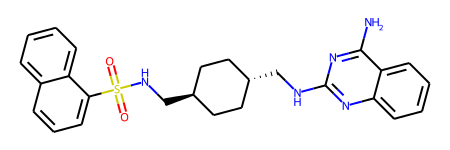

In [5497]:
M5 = mol_list [4]
M5

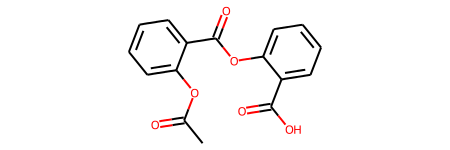

In [5498]:
M6 = mol_list [5]
M6

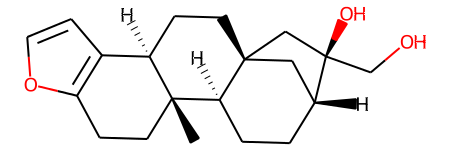

In [5499]:
M7 = mol_list [6]
M7

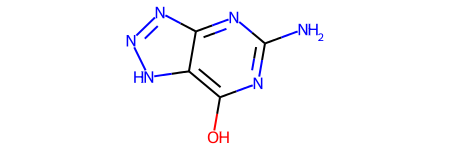

In [5500]:
M8 = mol_list [7]
M8

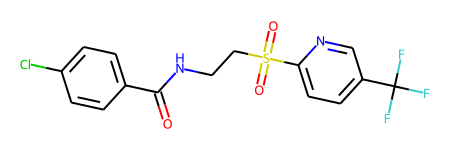

In [5501]:
M9 = mol_list [8]
M9

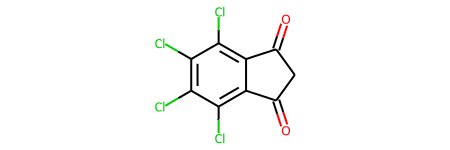

In [5502]:
M10 = mol_list [9]
M10

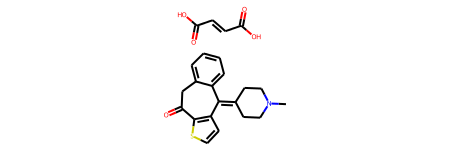

In [5503]:
M11 = mol_list [10]
M11

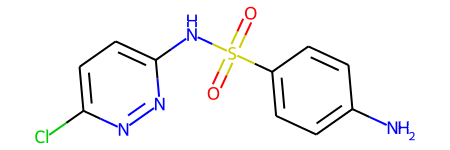

In [5504]:
M12 = mol_list [11]
M12

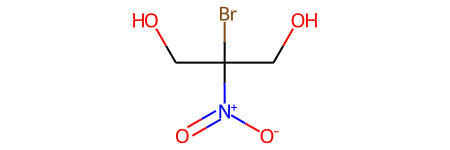

In [5505]:
M13 = mol_list [12]
M13

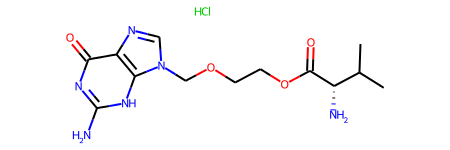

In [5506]:
M14 = mol_list [13]
M14

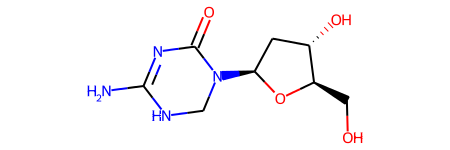

In [5507]:
M15 = mol_list [14]
M15

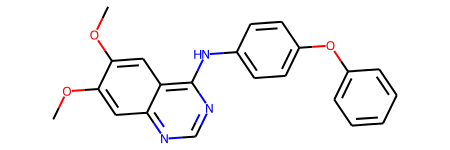

In [5508]:
M16 = mol_list [15]
M16

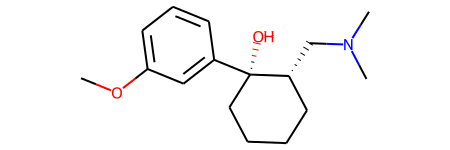

In [5509]:
M17 = mol_list [16]
M17

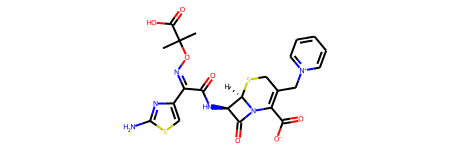

In [5510]:
M18 = mol_list [17]
M18

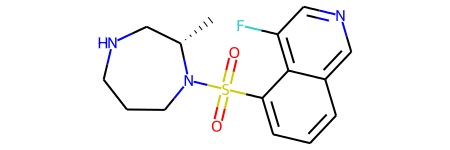

In [5511]:
M19 = mol_list [18]
M19

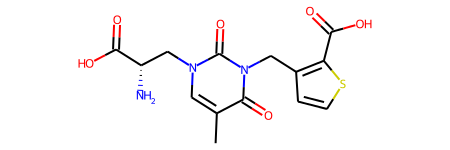

In [5512]:
M20 = mol_list [19]
M20

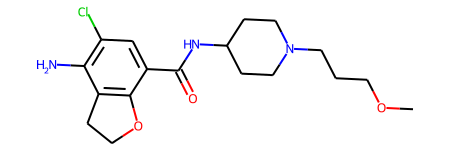

In [5513]:
M21 = mol_list [20]
M21

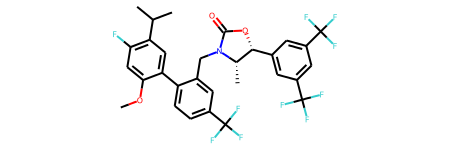

In [5514]:
M22 = mol_list [21]
M22

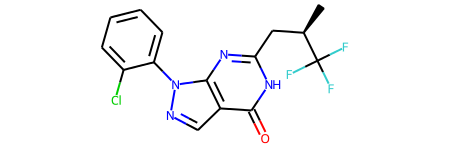

In [5515]:
M23 = mol_list [22]
M23

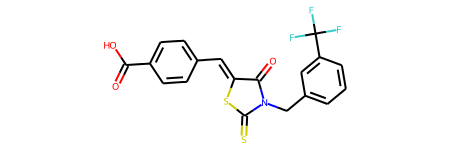

In [5516]:
M24 = mol_list [23]
M24

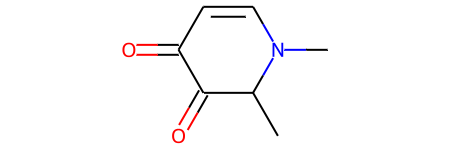

In [5517]:
M25 = mol_list [24]
M25

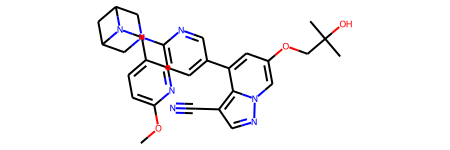

In [5518]:
M26 = mol_list [25]
M26

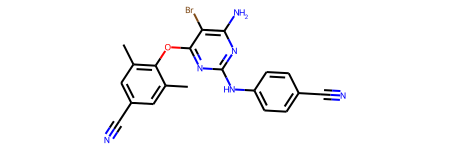

In [5519]:
M27 = mol_list [26]
M27

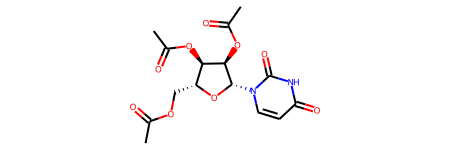

In [5520]:
M28 = mol_list [27]
M28

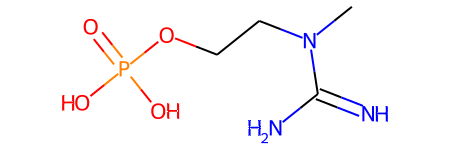

In [5521]:
M29 = mol_list [28]
M29

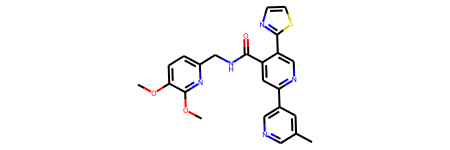

In [5522]:
M30 = mol_list [29]
M30

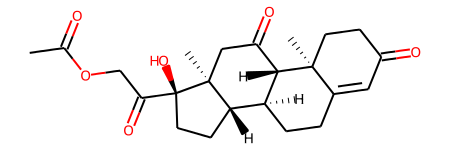

In [5523]:
M31 = mol_list [30]
M31

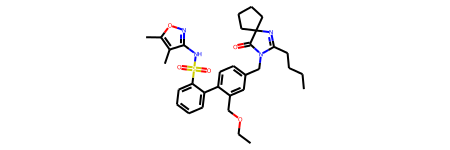

In [5524]:
M32 = mol_list [31]
M32

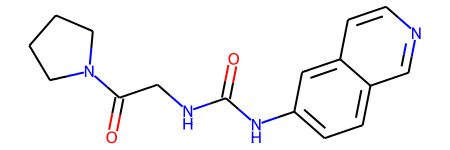

In [5525]:
M33 = mol_list [32]
M33

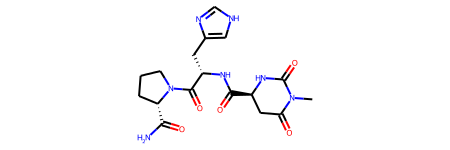

In [5526]:
M34 = mol_list [33]
M34

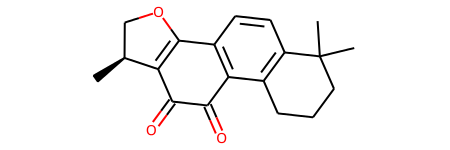

In [5527]:
M35 = mol_list [34]
M35

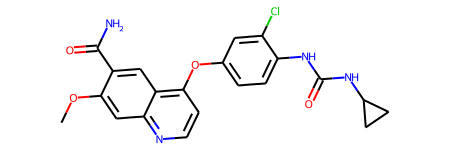

In [5528]:
M36 = mol_list [35]
M36

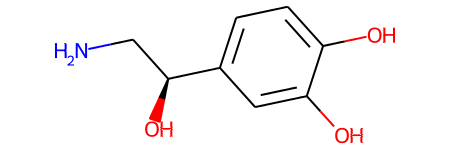

In [5529]:
M37= mol_list [36]
M37

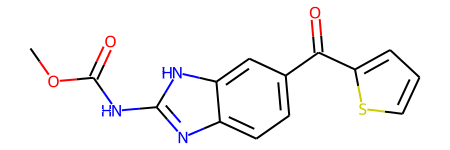

In [5530]:
M38= mol_list [37]
M38

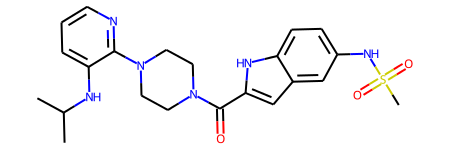

In [5531]:
M39= mol_list [38]
M39

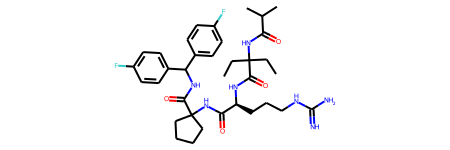

In [5532]:
M40= mol_list [39]
M40

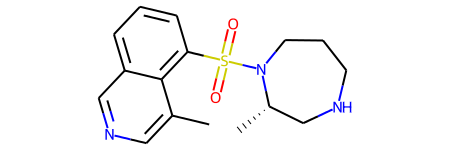

In [5533]:
M41= mol_list [40]
M41

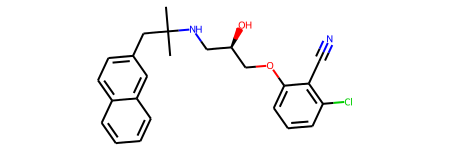

In [5534]:
M42= mol_list [41]
M42

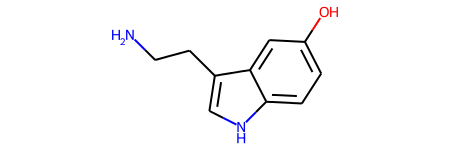

In [5535]:
M43= mol_list [42]
M43

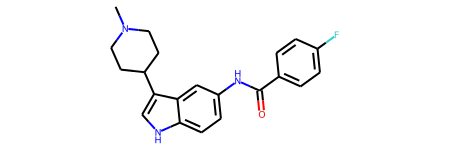

In [5536]:
M44= mol_list [43]
M44

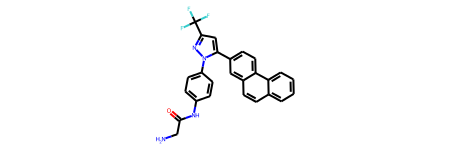

In [5537]:
M45= mol_list [44]
M45

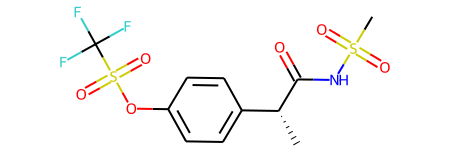

In [5538]:
M46= mol_list [45]
M46

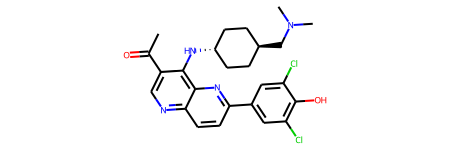

In [5539]:
M47= mol_list [46]
M47

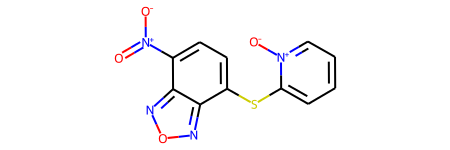

In [5540]:
M48= mol_list [47]
M48

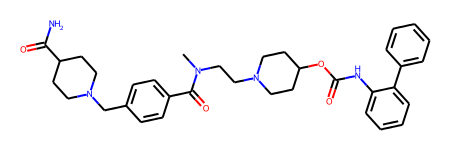

In [5541]:
M49= mol_list [48]
M49

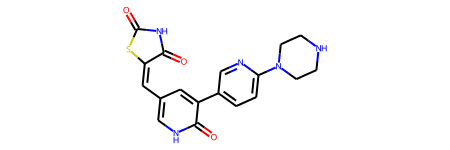

In [5542]:
M50= mol_list [49]
M50

In [5543]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[21,
 33,
 64,
 121,
 175,
 207,
 212,
 352,
 356,
 380,
 424,
 456,
 463,
 514,
 547,
 570,
 714,
 726,
 768,
 779,
 780,
 838,
 849,
 896,
 926,
 935,
 969,
 984]

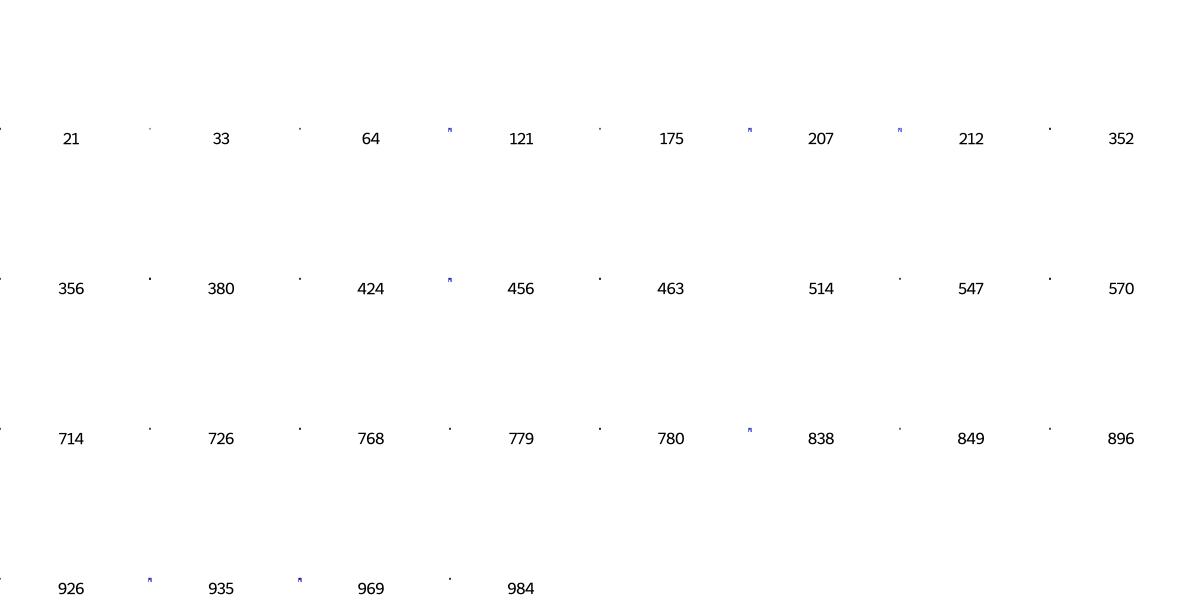

In [5544]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [5545]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[27,
 33,
 83,
 84,
 130,
 135,
 136,
 147,
 232,
 297,
 323,
 329,
 350,
 356,
 361,
 378,
 381,
 407,
 409,
 417,
 428,
 433,
 444,
 452,
 456,
 463,
 483,
 511,
 523,
 554,
 644,
 650,
 654,
 656,
 692,
 714,
 731,
 747,
 831,
 849,
 891,
 926,
 935,
 950,
 966,
 1014]

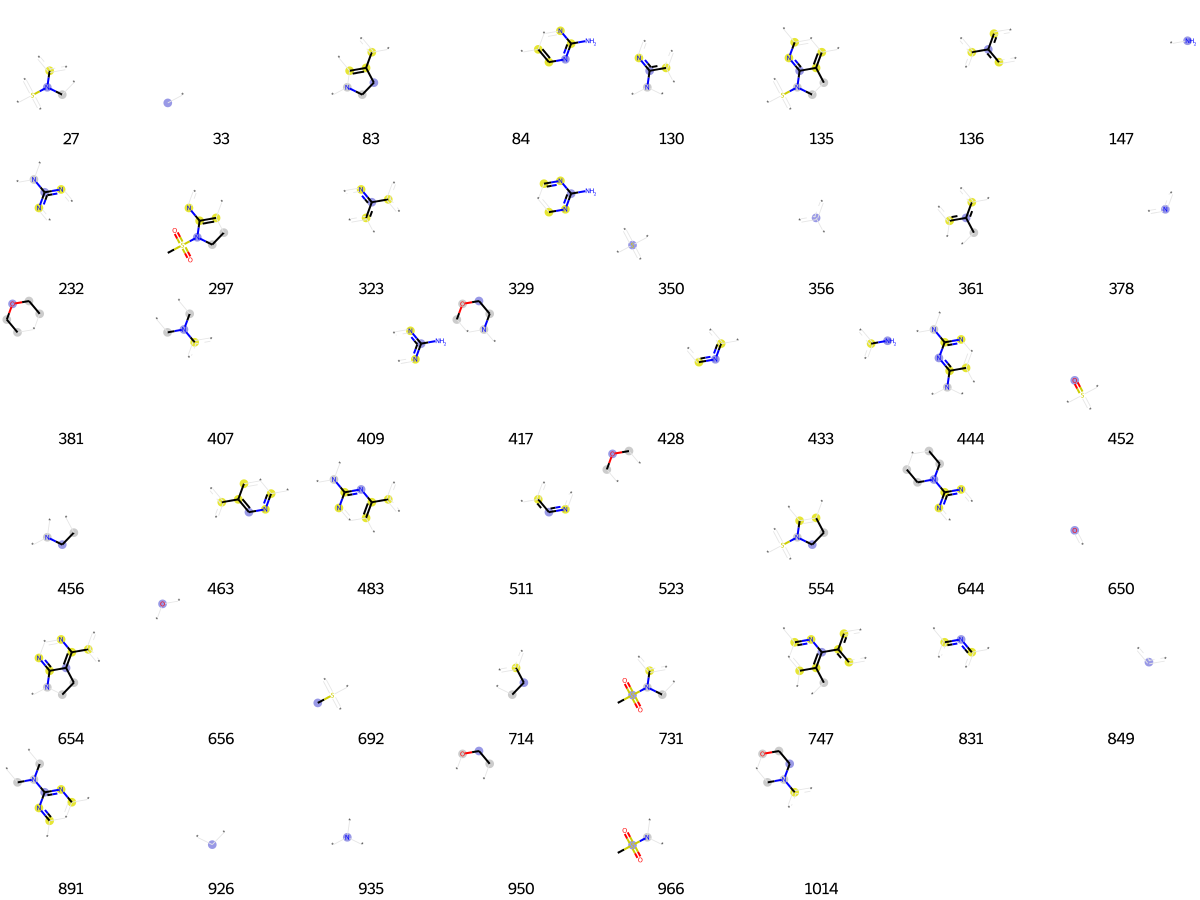

In [5546]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [5547]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[2,
 4,
 33,
 128,
 166,
 235,
 307,
 319,
 331,
 350,
 356,
 452,
 456,
 502,
 516,
 582,
 650,
 698,
 715,
 726,
 772,
 799,
 807,
 836,
 849,
 850,
 883,
 893,
 896,
 926,
 935,
 965,
 974]

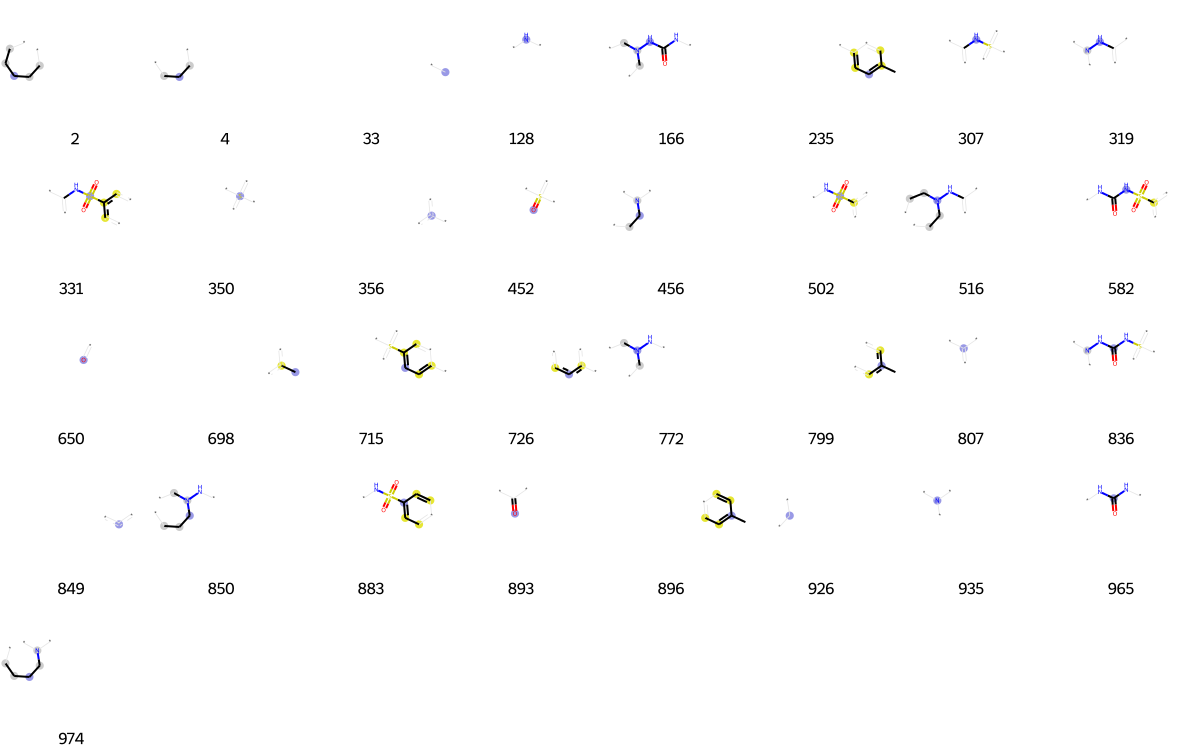

In [5548]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [5549]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 46,
 58,
 80,
 87,
 121,
 136,
 147,
 173,
 215,
 216,
 233,
 294,
 319,
 350,
 356,
 397,
 422,
 452,
 465,
 561,
 583,
 650,
 659,
 668,
 669,
 698,
 715,
 726,
 742,
 772,
 801,
 807,
 816,
 833,
 849,
 875,
 893,
 896,
 898,
 935,
 956,
 967,
 969]

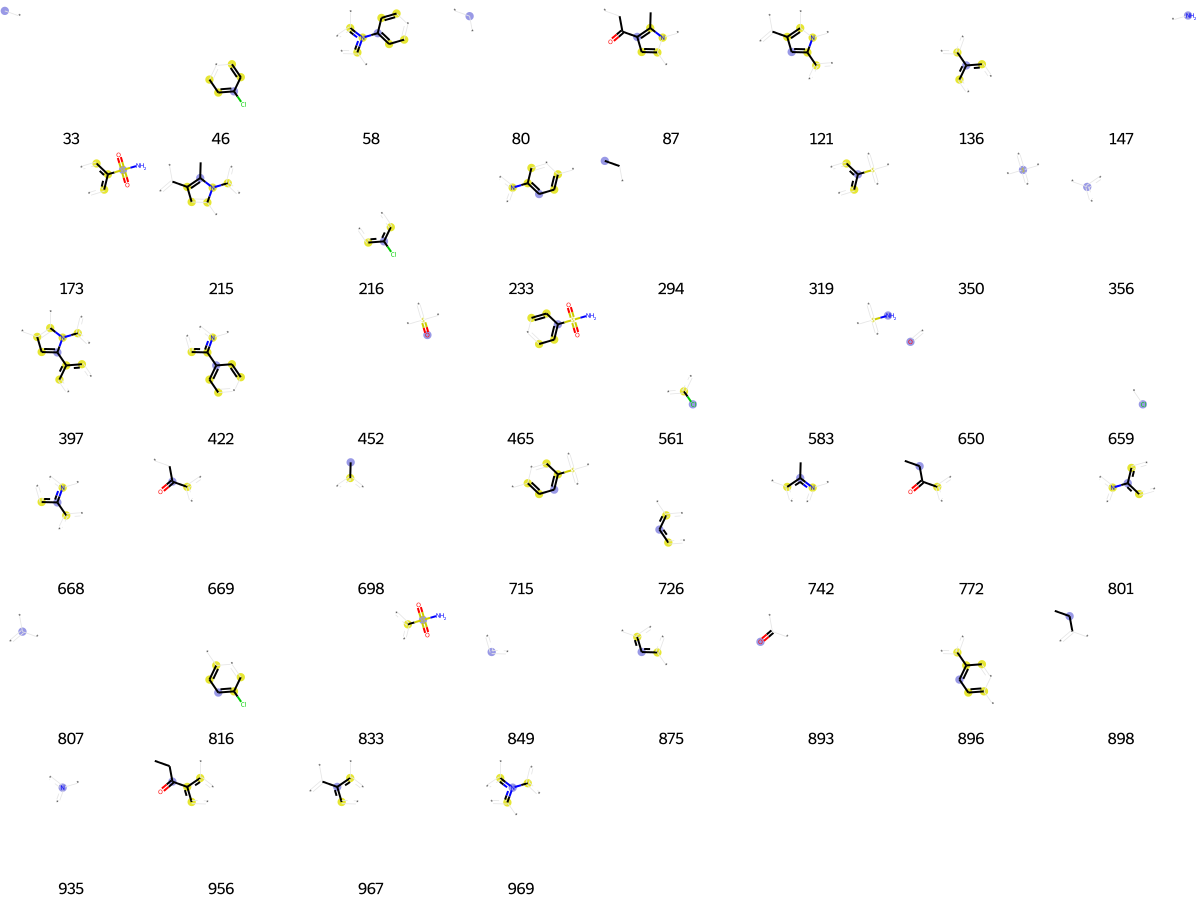

In [5550]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [5551]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[15,
 29,
 63,
 64,
 73,
 80,
 128,
 134,
 147,
 175,
 212,
 232,
 278,
 288,
 289,
 301,
 333,
 348,
 350,
 356,
 373,
 378,
 389,
 392,
 433,
 435,
 452,
 502,
 549,
 558,
 580,
 602,
 647,
 650,
 695,
 715,
 726,
 790,
 804,
 825,
 831,
 849,
 926,
 937,
 992,
 1019]

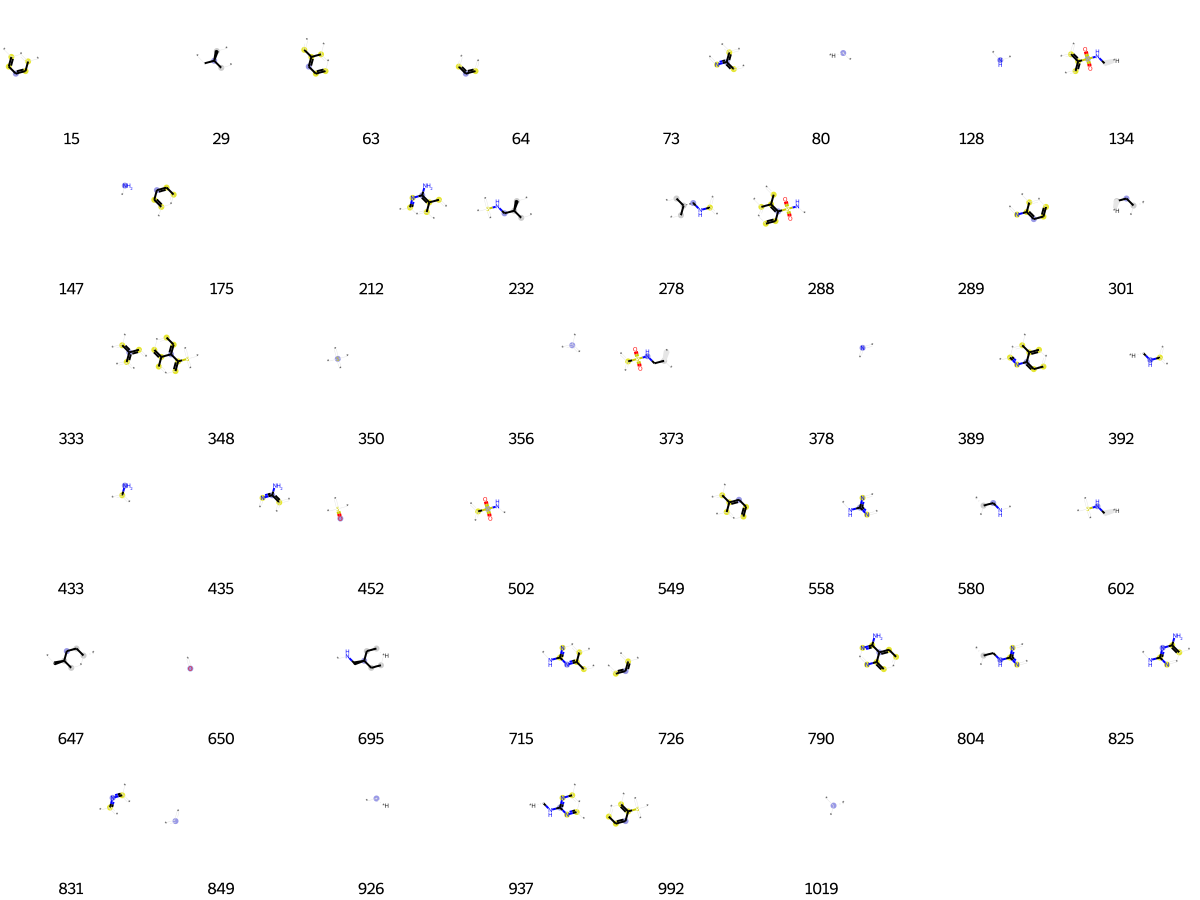

In [5552]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [5553]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[11,
 23,
 33,
 64,
 145,
 175,
 310,
 356,
 386,
 389,
 423,
 444,
 456,
 592,
 632,
 650,
 695,
 705,
 726,
 751,
 807,
 849,
 893,
 909,
 946,
 967,
 984,
 1017]

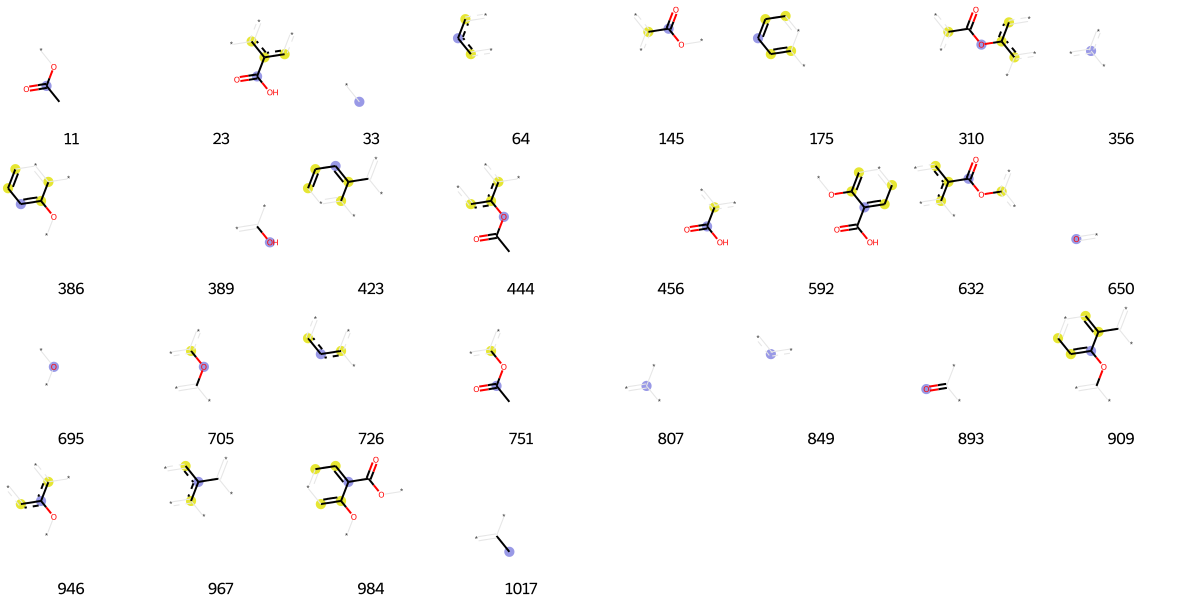

In [5554]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [5555]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 3,
 33,
 34,
 36,
 78,
 80,
 98,
 130,
 138,
 166,
 209,
 219,
 222,
 250,
 300,
 301,
 310,
 313,
 356,
 389,
 453,
 478,
 492,
 502,
 527,
 528,
 581,
 656,
 679,
 690,
 699,
 714,
 718,
 726,
 778,
 787,
 807,
 832,
 849,
 866,
 895,
 907,
 926,
 945,
 956,
 1016,
 1019]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


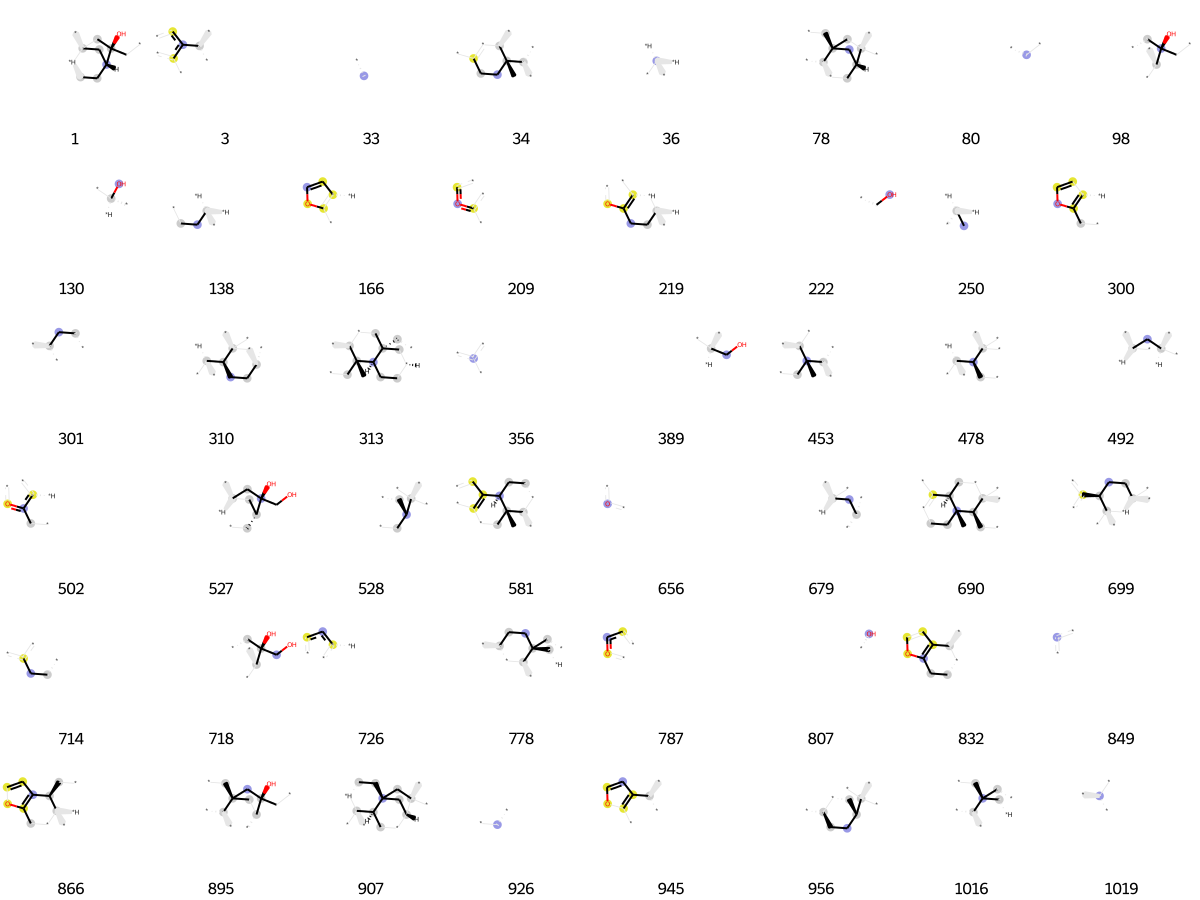

In [5556]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [5557]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[74,
 90,
 106,
 120,
 140,
 143,
 147,
 216,
 356,
 377,
 378,
 409,
 433,
 506,
 578,
 600,
 635,
 702,
 772,
 806,
 807,
 831,
 867,
 922]

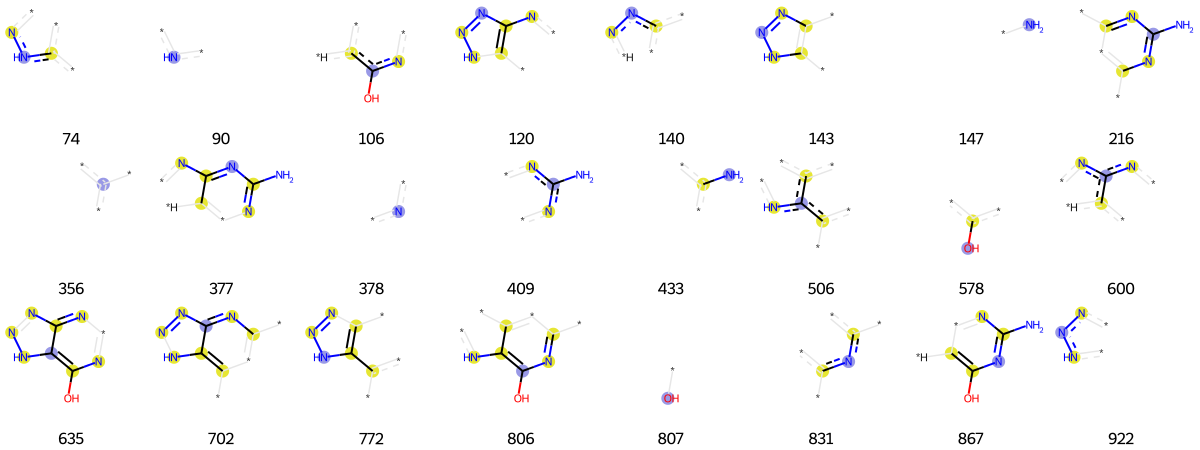

In [5558]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [5559]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[8,
 19,
 22,
 46,
 59,
 80,
 114,
 128,
 150,
 162,
 197,
 216,
 236,
 265,
 350,
 356,
 361,
 378,
 393,
 428,
 429,
 452,
 481,
 486,
 511,
 552,
 561,
 641,
 650,
 659,
 667,
 673,
 712,
 726,
 781,
 807,
 809,
 816,
 849,
 870,
 893,
 904,
 983]

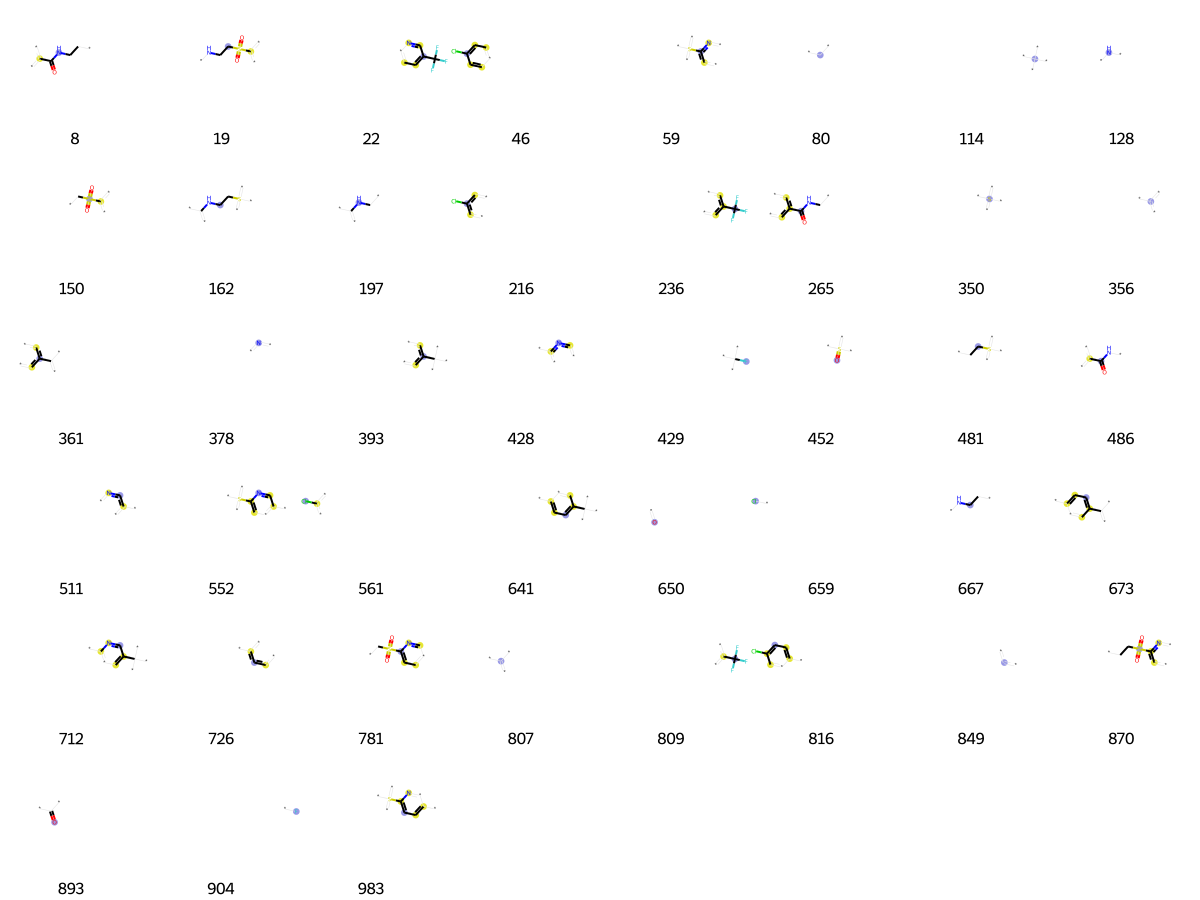

In [5560]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [5561]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[170, 314, 346, 350, 356, 540, 561, 574, 617, 650, 659, 723, 751, 926, 1011]

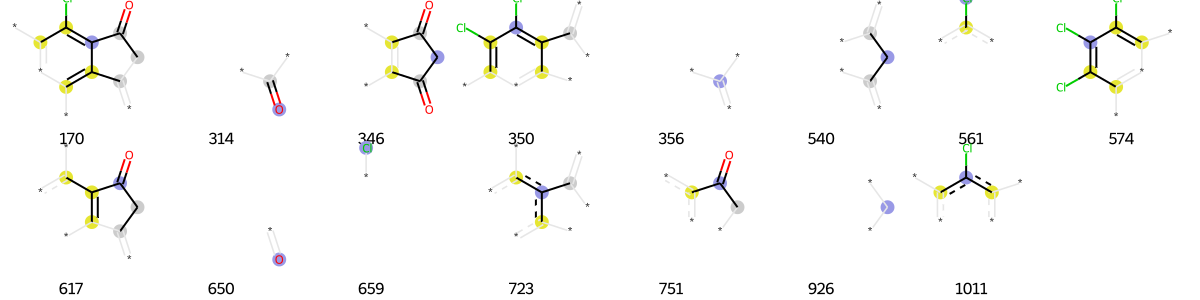

In [5562]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [5563]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[14,
 20,
 31,
 33,
 57,
 64,
 121,
 175,
 193,
 207,
 212,
 302,
 314,
 352,
 356,
 380,
 389,
 452,
 456,
 474,
 508,
 540,
 543,
 550,
 554,
 570,
 650,
 670,
 675,
 684,
 694,
 714,
 726,
 751,
 768,
 779,
 807,
 838,
 849,
 882,
 893,
 926,
 935,
 969,
 976,
 980,
 984]

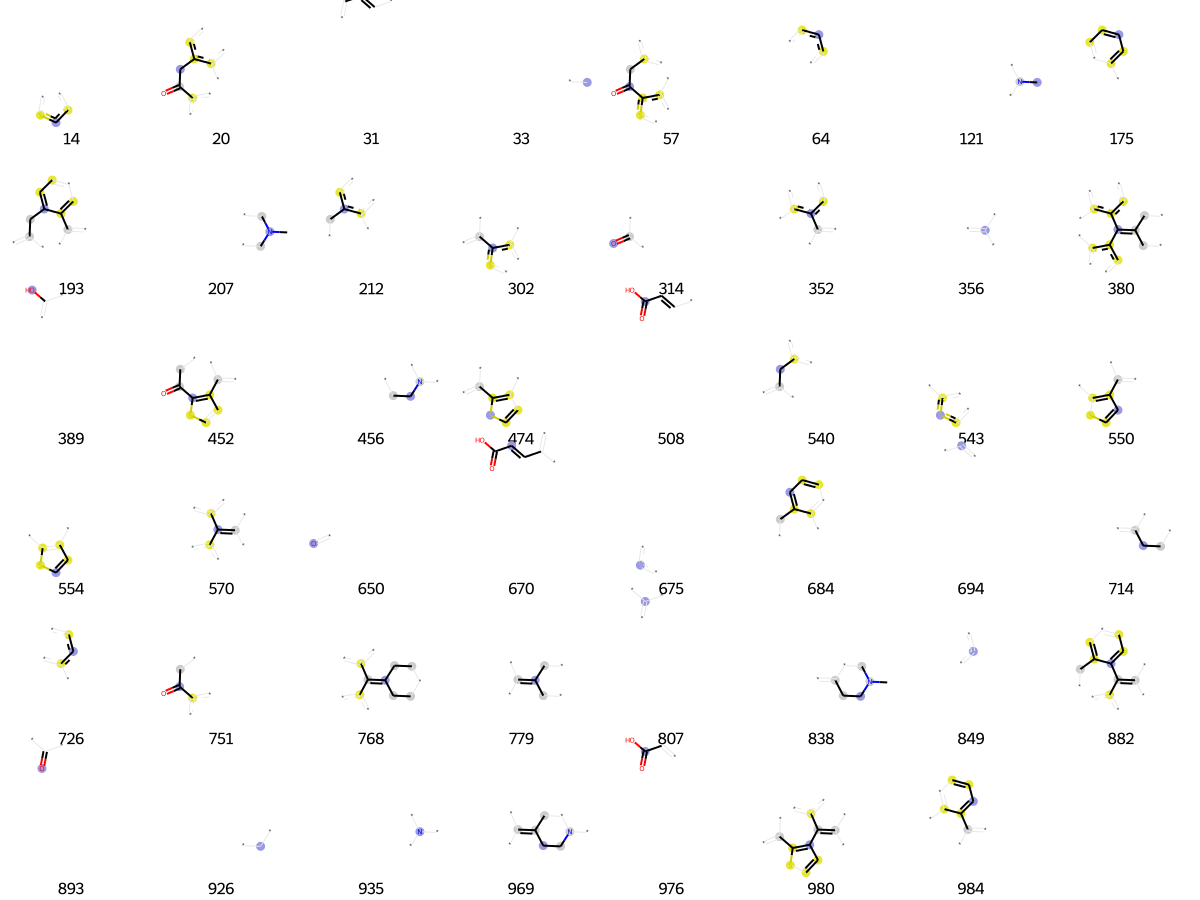

In [5564]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [5565]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[4,
 75,
 103,
 128,
 140,
 144,
 147,
 246,
 298,
 319,
 350,
 352,
 354,
 356,
 378,
 433,
 452,
 502,
 561,
 643,
 650,
 651,
 659,
 715,
 726,
 734,
 780,
 849,
 883,
 888,
 967]

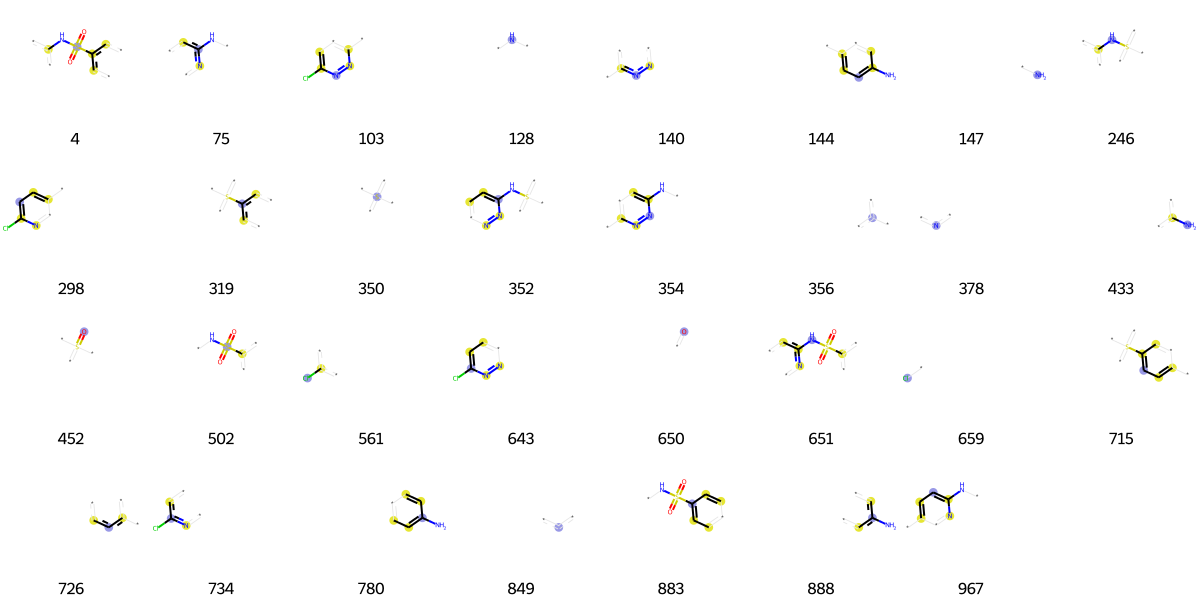

In [5566]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [5567]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[80,
 101,
 114,
 115,
 222,
 379,
 398,
 502,
 650,
 680,
 715,
 728,
 753,
 807,
 838,
 849,
 939]

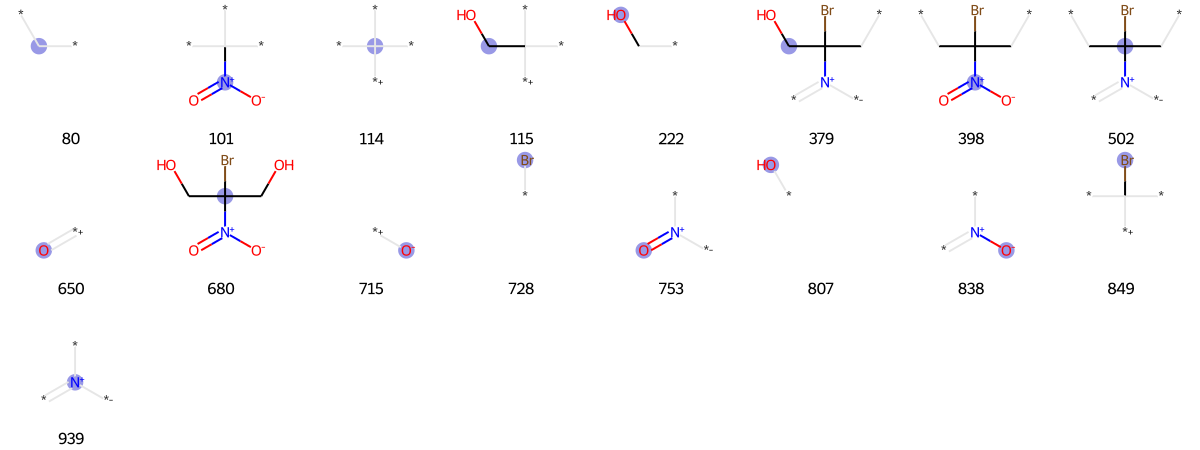

In [5568]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [5569]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 13,
 33,
 71,
 80,
 90,
 134,
 147,
 219,
 221,
 283,
 293,
 314,
 334,
 351,
 356,
 378,
 405,
 428,
 431,
 433,
 514,
 625,
 650,
 657,
 695,
 697,
 700,
 701,
 721,
 727,
 742,
 749,
 786,
 804,
 807,
 831,
 849,
 852,
 860,
 893,
 896,
 932,
 935,
 968,
 970,
 979,
 1022]

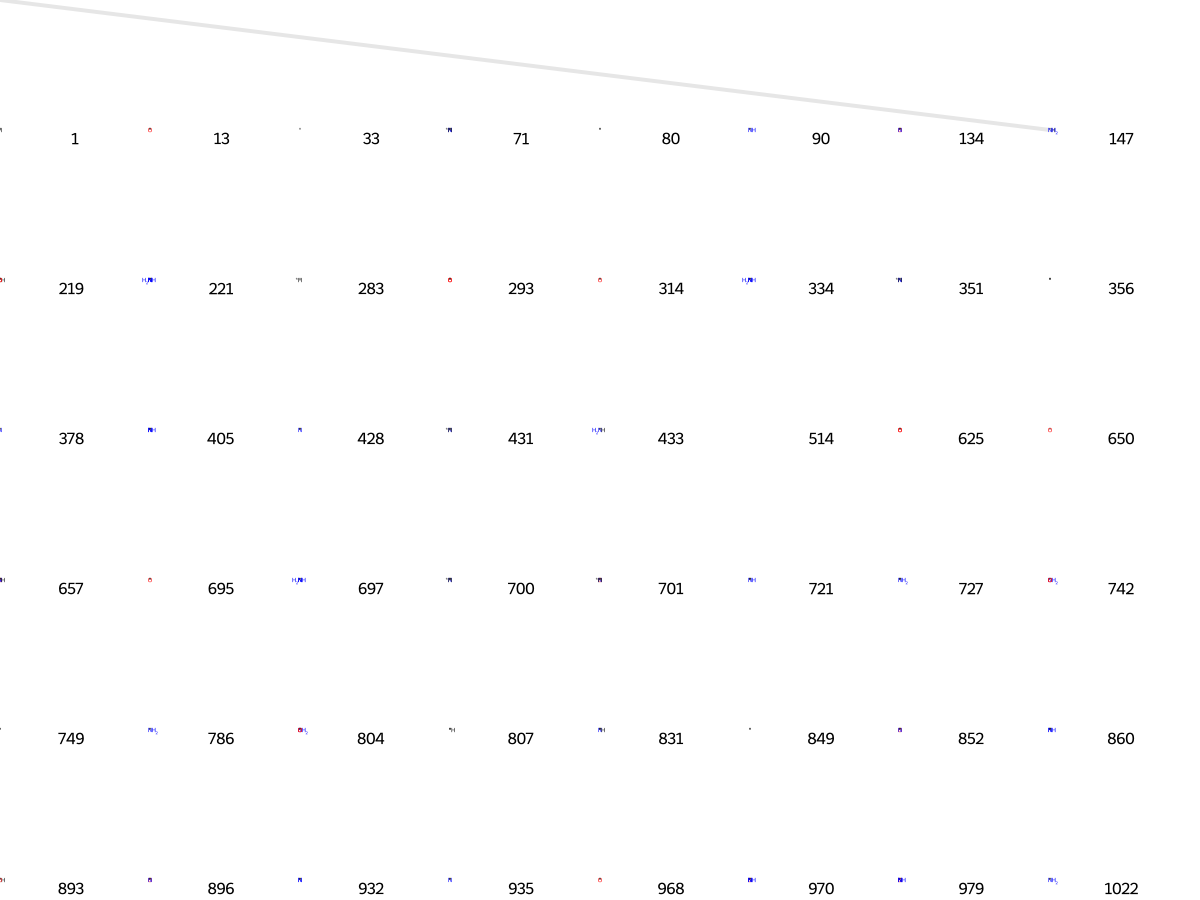

In [5570]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [5571]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 80,
 90,
 147,
 185,
 222,
 233,
 240,
 268,
 288,
 314,
 356,
 378,
 395,
 425,
 427,
 433,
 439,
 492,
 601,
 610,
 650,
 652,
 656,
 684,
 698,
 740,
 773,
 807,
 842,
 849,
 858,
 878,
 896,
 897,
 926,
 927,
 935,
 1019]

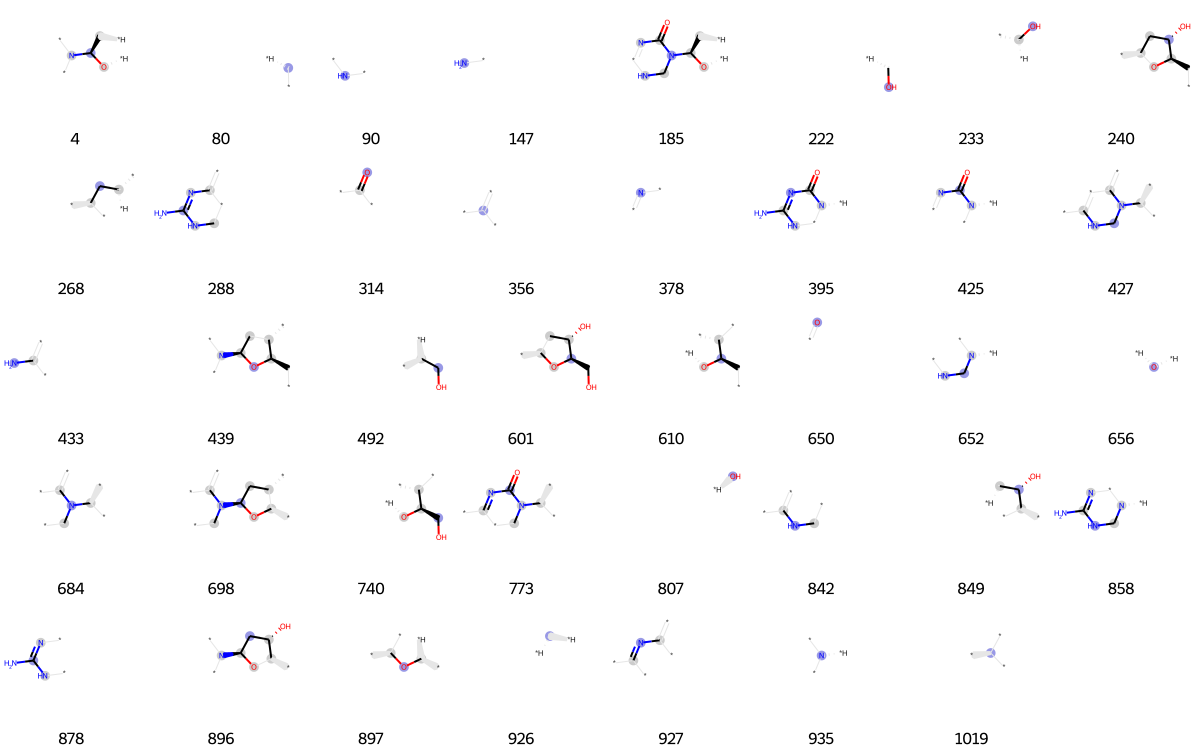

In [5572]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [5573]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 64,
 73,
 128,
 133,
 175,
 191,
 193,
 202,
 221,
 228,
 249,
 322,
 333,
 343,
 356,
 378,
 389,
 428,
 489,
 491,
 500,
 512,
 562,
 593,
 624,
 673,
 695,
 708,
 718,
 726,
 780,
 786,
 794,
 841,
 843,
 849,
 875,
 888,
 946]

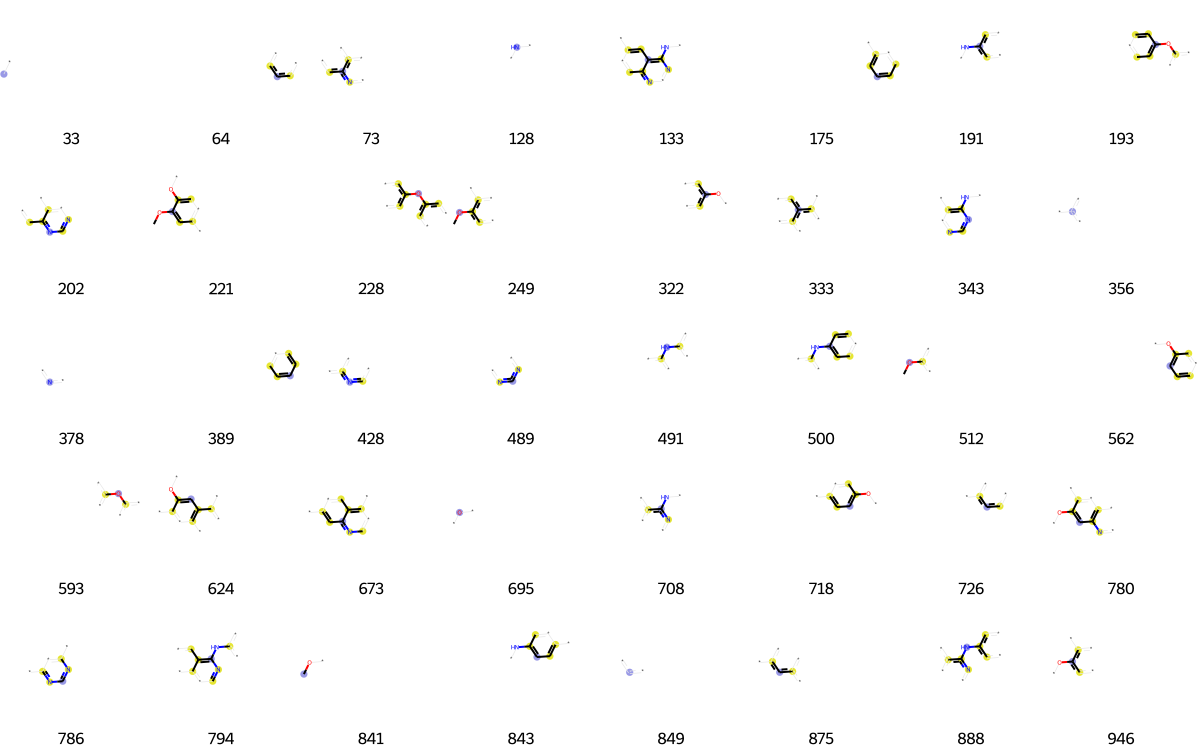

In [5574]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [5575]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[4,
 15,
 33,
 36,
 64,
 80,
 82,
 122,
 130,
 138,
 139,
 150,
 182,
 301,
 303,
 322,
 356,
 512,
 556,
 562,
 604,
 614,
 652,
 695,
 726,
 772,
 781,
 807,
 808,
 834,
 841,
 849,
 874,
 875,
 881,
 890,
 926,
 948,
 1019]

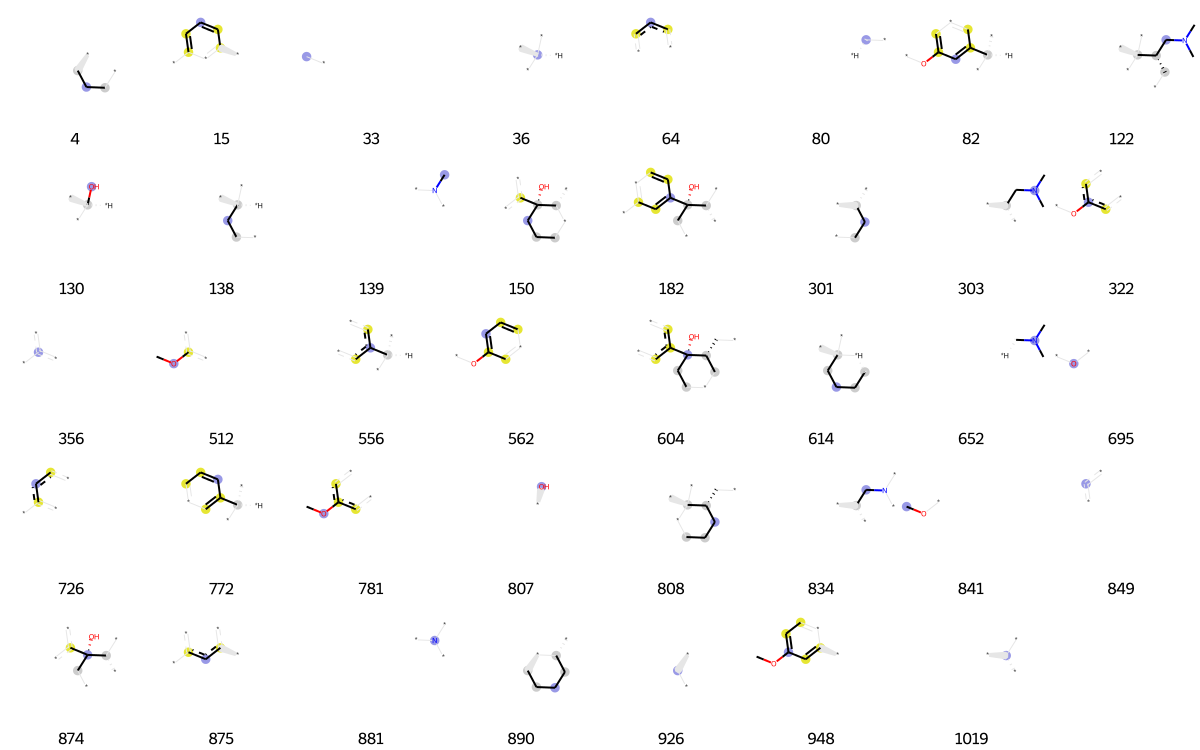

In [5576]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [5577]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[5,
 33,
 39,
 64,
 80,
 114,
 128,
 147,
 150,
 179,
 183,
 186,
 202,
 212,
 228,
 233,
 235,
 240,
 243,
 255,
 283,
 314,
 328,
 334,
 356,
 378,
 387,
 389,
 392,
 417,
 418,
 431,
 433,
 440,
 463,
 470,
 484,
 485,
 523,
 543,
 544,
 552,
 570,
 614,
 637,
 650,
 653,
 675,
 695,
 698,
 715,
 725,
 738,
 753,
 792,
 807,
 813,
 831,
 849,
 855,
 859,
 872,
 882,
 893,
 898,
 926,
 935,
 953,
 963,
 997,
 998,
 1003,
 1019]

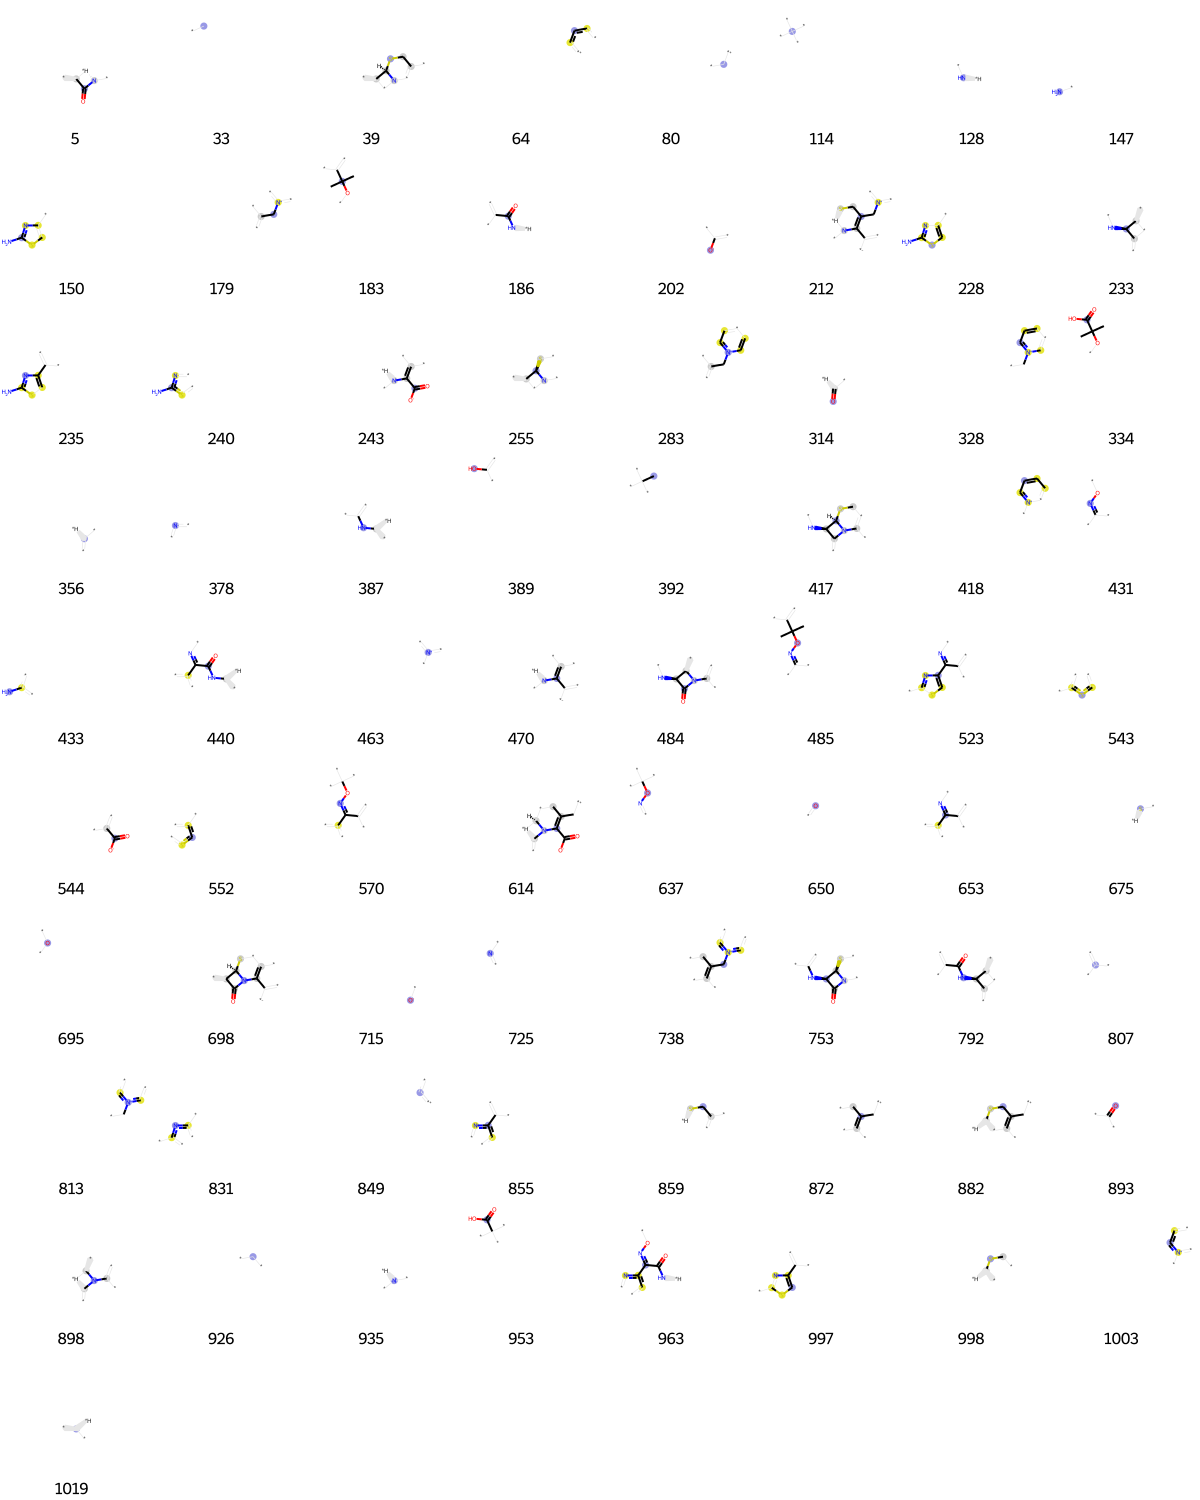

In [5578]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [5579]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 15,
 33,
 56,
 63,
 64,
 90,
 142,
 249,
 284,
 285,
 305,
 350,
 354,
 356,
 373,
 378,
 392,
 452,
 456,
 470,
 511,
 579,
 590,
 649,
 650,
 662,
 688,
 699,
 726,
 733,
 734,
 760,
 794,
 800,
 803,
 816,
 831,
 849,
 897,
 904,
 915,
 926,
 935,
 960,
 992,
 1019]

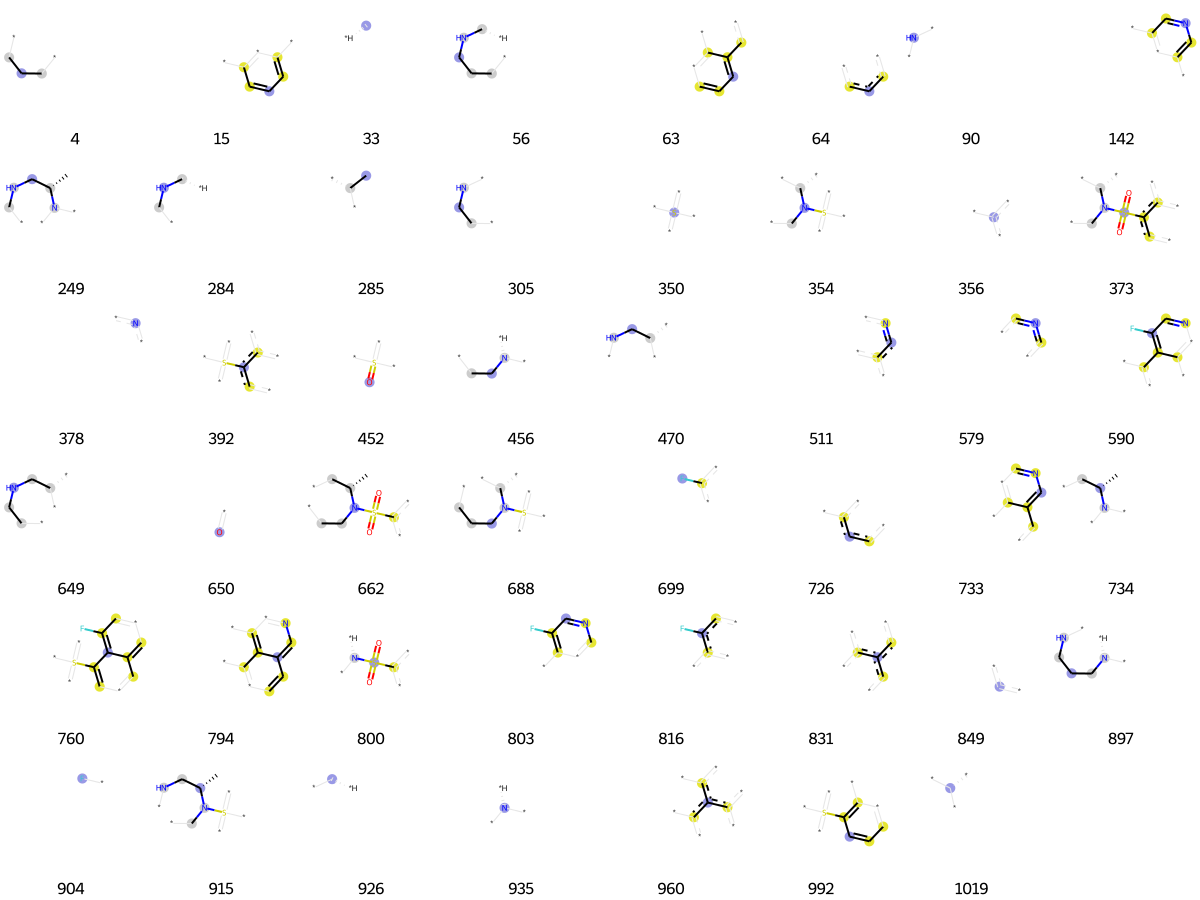

In [5580]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [5581]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 13,
 14,
 17,
 33,
 80,
 111,
 147,
 168,
 314,
 325,
 337,
 356,
 367,
 389,
 403,
 431,
 456,
 464,
 504,
 532,
 543,
 549,
 554,
 650,
 675,
 698,
 726,
 727,
 741,
 771,
 781,
 786,
 802,
 807,
 818,
 820,
 825,
 849,
 862,
 875,
 881,
 893,
 898,
 935,
 1002,
 1019]

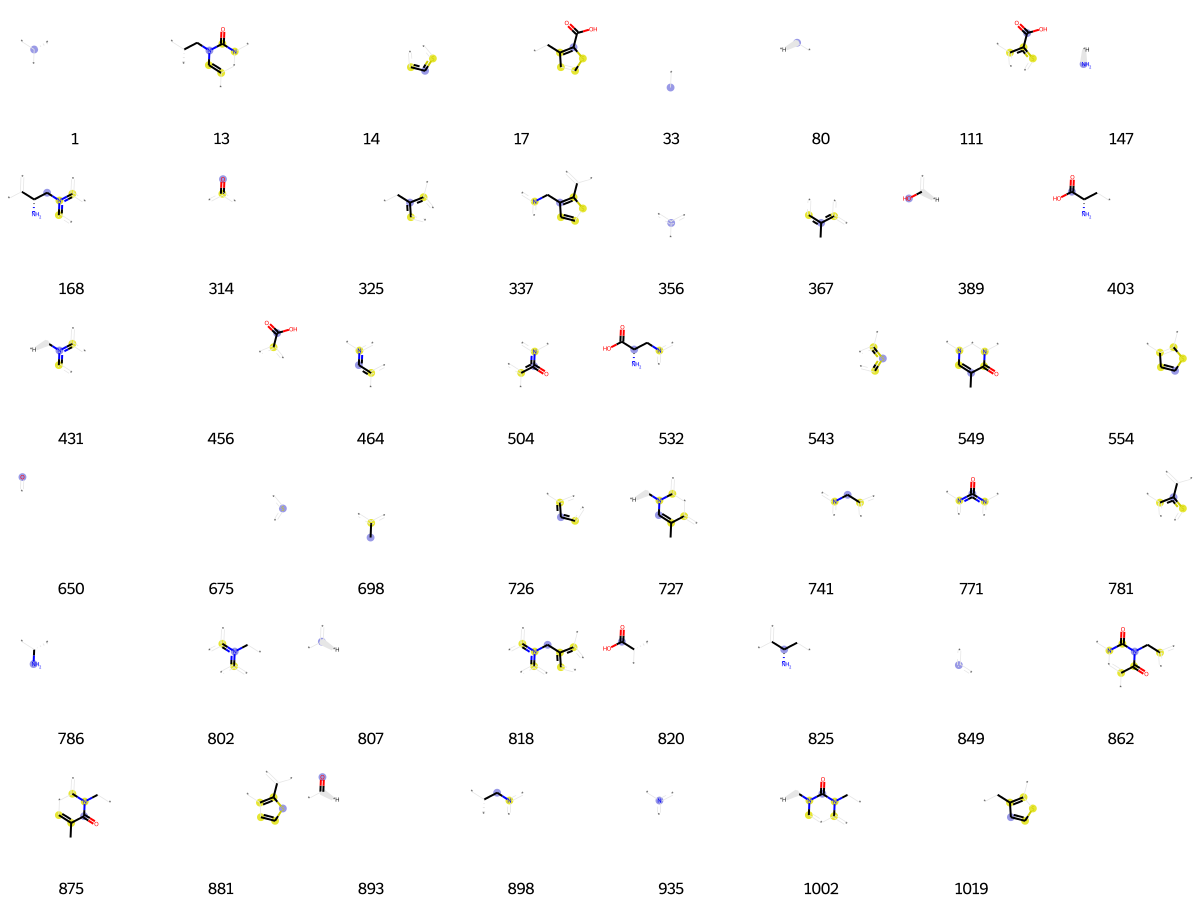

In [5582]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [5583]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[13,
 33,
 80,
 121,
 128,
 144,
 147,
 237,
 270,
 272,
 275,
 301,
 317,
 352,
 356,
 361,
 366,
 387,
 404,
 433,
 441,
 456,
 458,
 486,
 561,
 610,
 631,
 638,
 650,
 653,
 656,
 659,
 667,
 680,
 688,
 695,
 705,
 714,
 767,
 807,
 841,
 849,
 854,
 875,
 887,
 893,
 917,
 923,
 926,
 935,
 950,
 951,
 967,
 1005,
 1019]

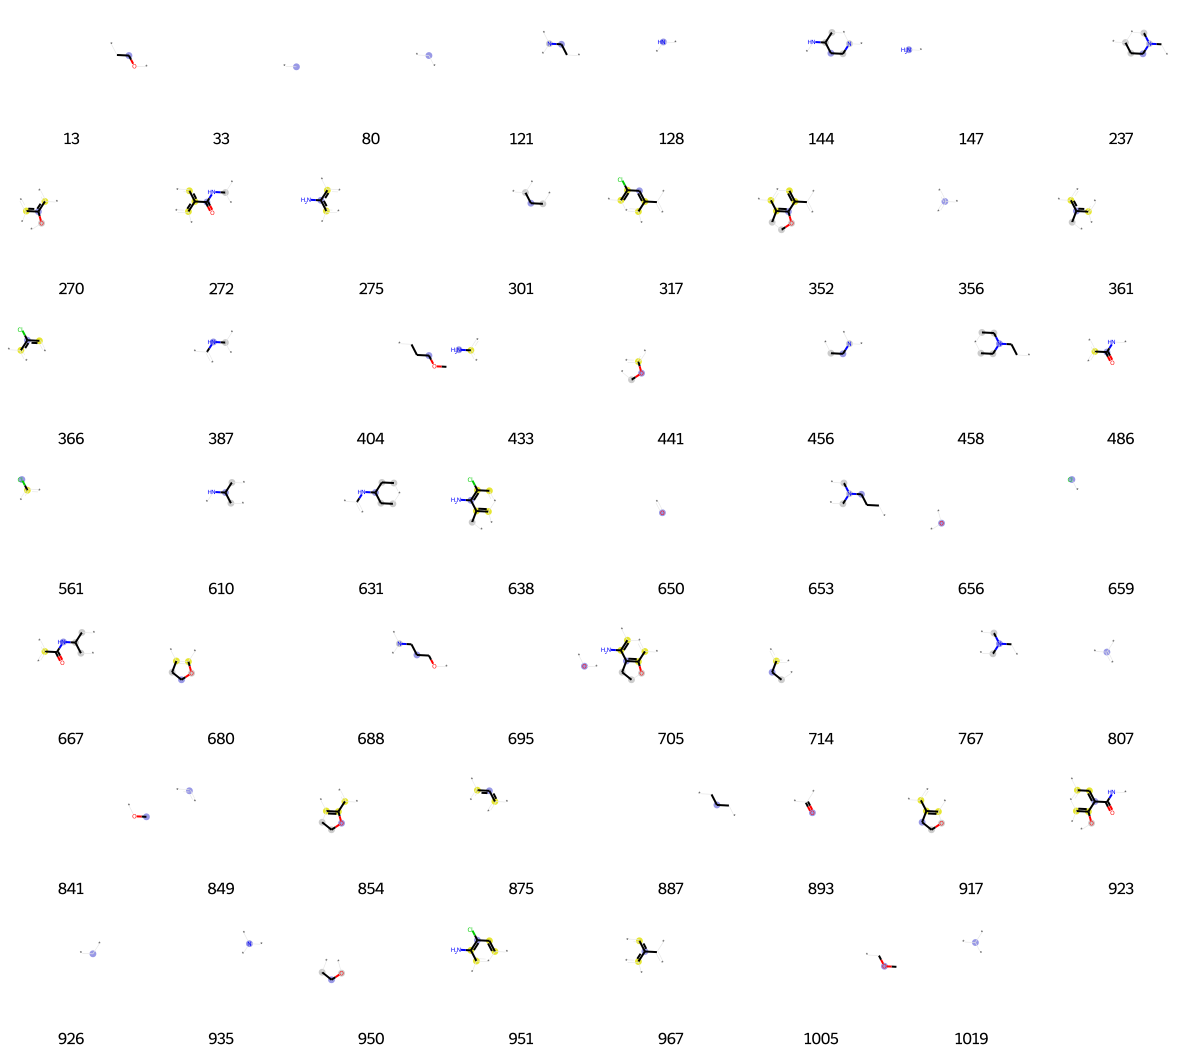

In [5584]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [5585]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 33,
 60,
 64,
 70,
 80,
 101,
 114,
 121,
 129,
 134,
 222,
 236,
 237,
 249,
 255,
 283,
 285,
 314,
 325,
 352,
 356,
 369,
 393,
 429,
 455,
 498,
 512,
 590,
 598,
 608,
 621,
 641,
 650,
 656,
 680,
 695,
 699,
 724,
 726,
 735,
 741,
 750,
 751,
 771,
 780,
 809,
 816,
 834,
 841,
 849,
 875,
 883,
 903,
 904,
 935,
 937,
 946,
 970,
 990,
 1019]

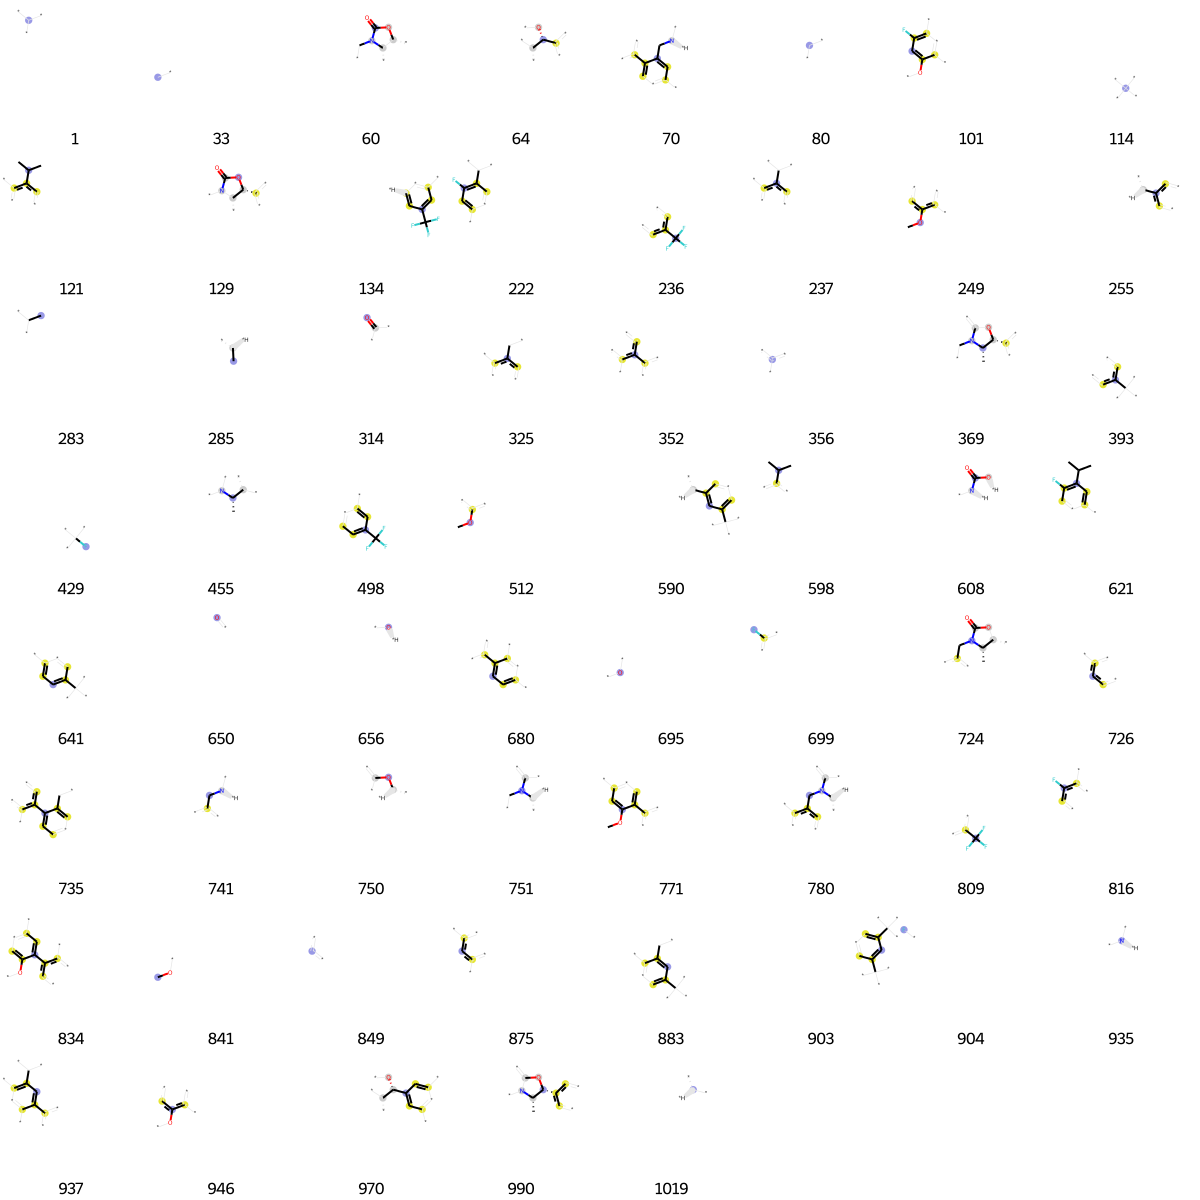

In [5586]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [5587]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 9,
 33,
 43,
 64,
 65,
 79,
 80,
 83,
 90,
 114,
 133,
 136,
 146,
 175,
 206,
 213,
 257,
 271,
 283,
 314,
 333,
 352,
 356,
 366,
 378,
 403,
 409,
 429,
 511,
 561,
 623,
 627,
 650,
 659,
 672,
 721,
 726,
 750,
 804,
 820,
 827,
 828,
 831,
 849,
 904,
 935,
 974,
 1002]

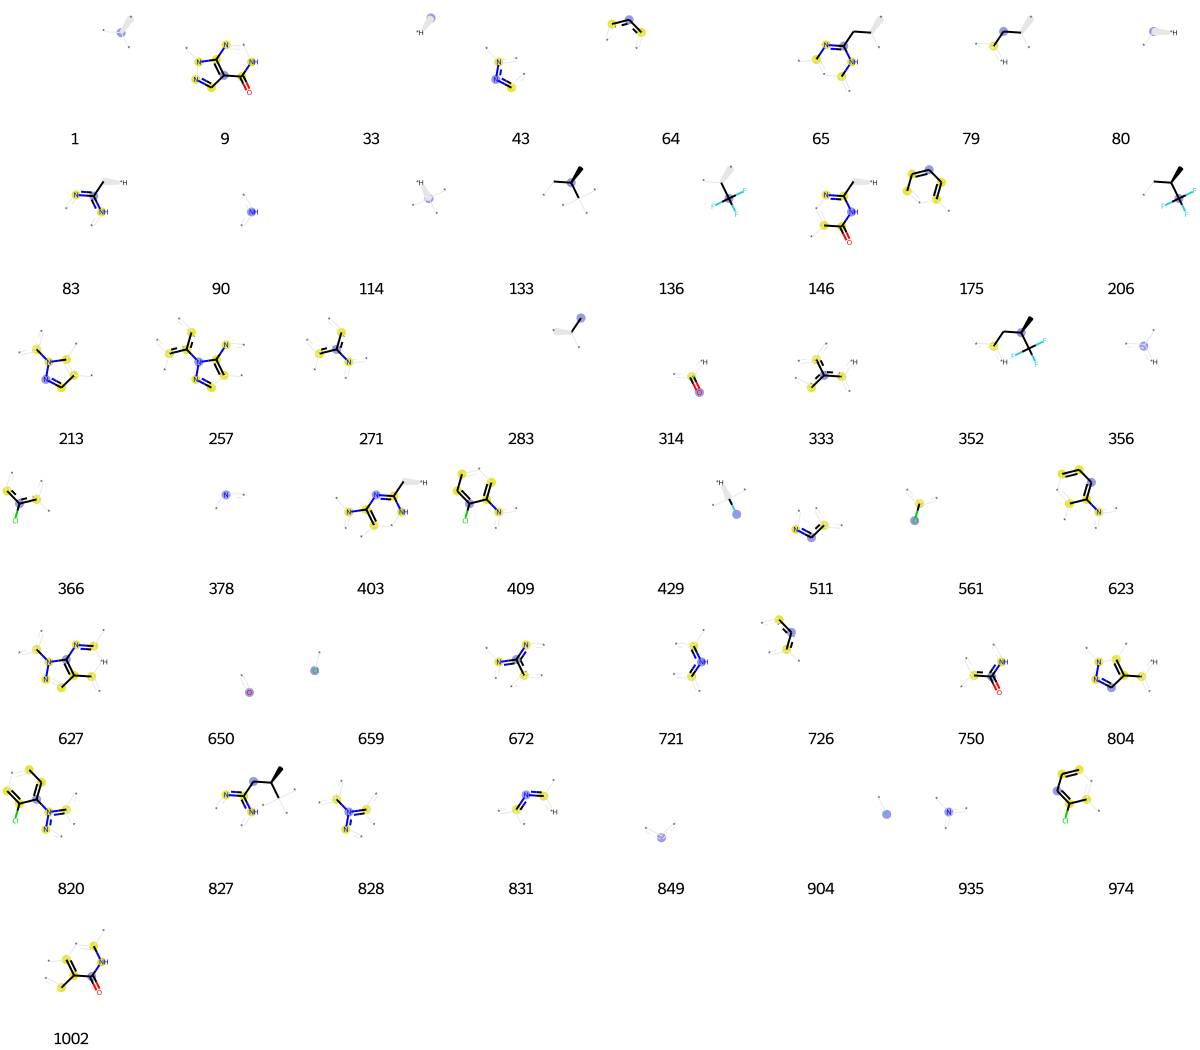

In [5588]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [5589]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[3,
 15,
 25,
 42,
 64,
 80,
 97,
 106,
 114,
 215,
 236,
 273,
 281,
 314,
 344,
 356,
 361,
 389,
 393,
 418,
 429,
 456,
 475,
 498,
 588,
 591,
 650,
 673,
 675,
 693,
 694,
 726,
 730,
 741,
 744,
 749,
 807,
 809,
 849,
 863,
 875,
 879,
 880,
 893,
 904,
 935,
 947,
 993,
 1009,
 1020]

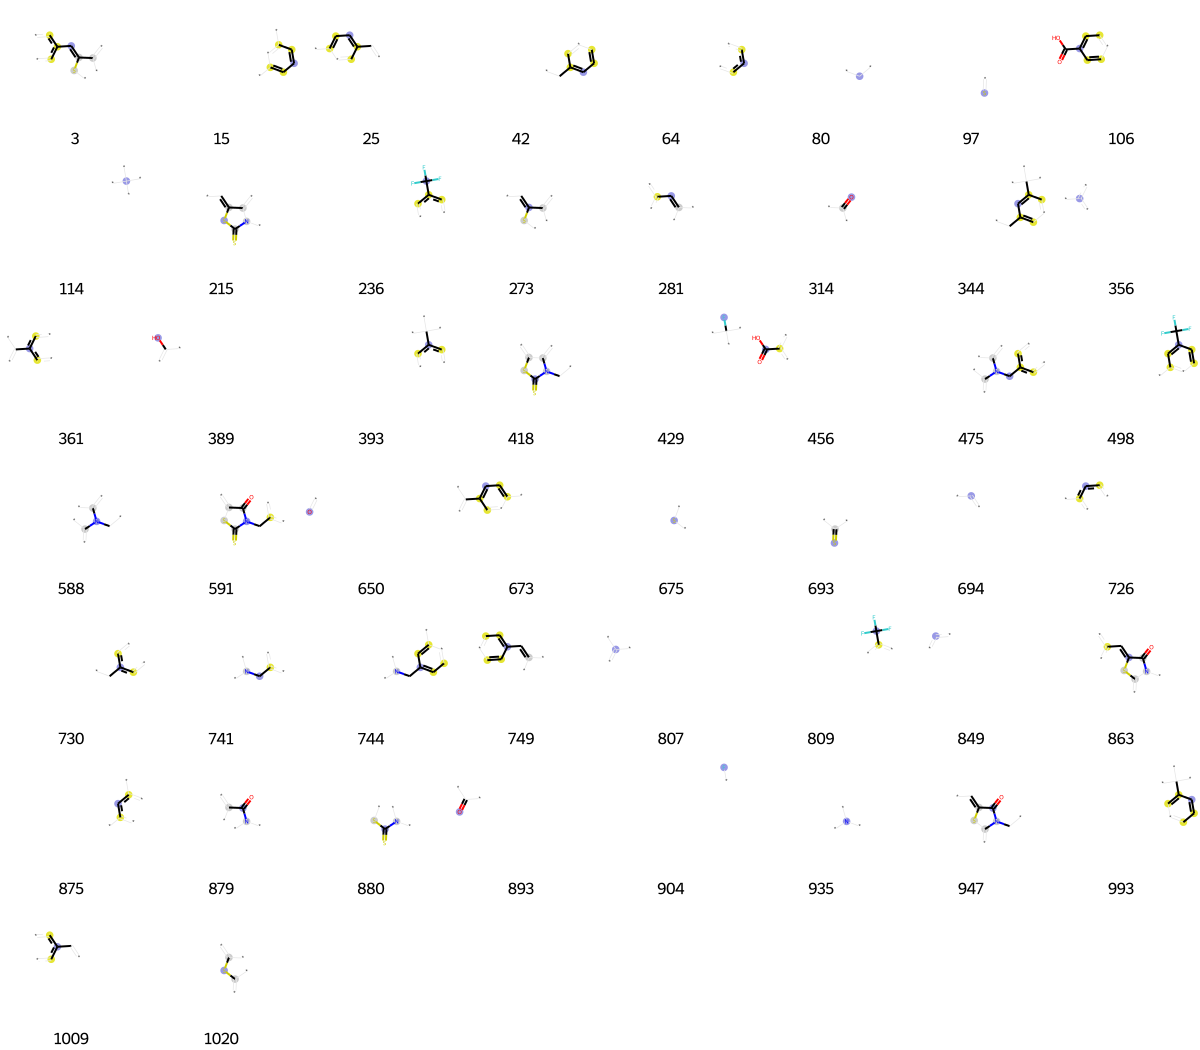

In [5590]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [5591]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 121,
 160,
 276,
 285,
 314,
 356,
 499,
 511,
 547,
 634,
 650,
 714,
 747,
 813,
 816,
 849,
 896,
 903,
 935,
 1019]

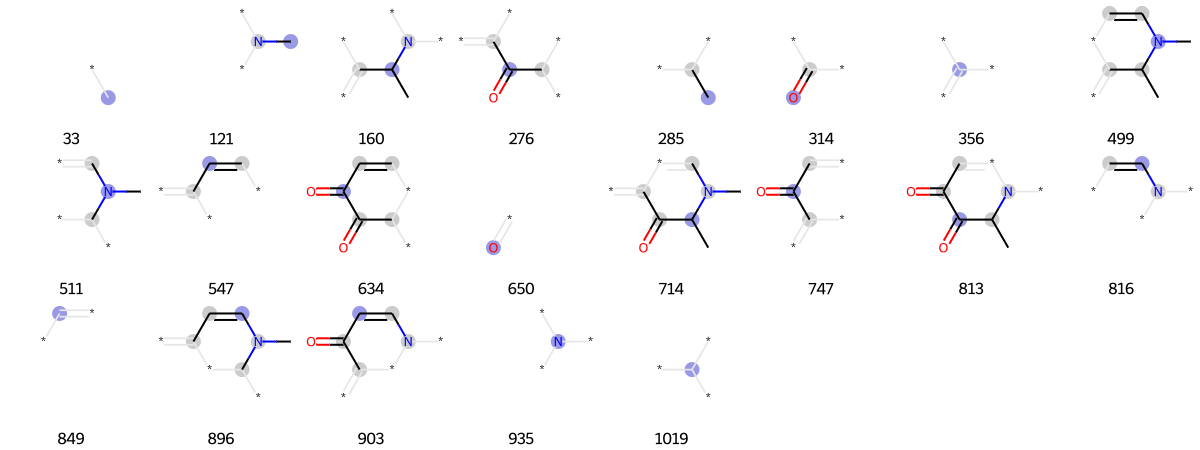

In [5592]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [5593]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[3,
 33,
 40,
 43,
 70,
 80,
 93,
 112,
 114,
 123,
 136,
 161,
 204,
 217,
 249,
 260,
 268,
 271,
 310,
 311,
 322,
 346,
 352,
 356,
 360,
 361,
 372,
 375,
 378,
 388,
 392,
 407,
 416,
 428,
 463,
 464,
 487,
 494,
 511,
 512,
 527,
 546,
 568,
 635,
 674,
 690,
 695,
 720,
 726,
 730,
 739,
 741,
 787,
 790,
 807,
 816,
 817,
 838,
 841,
 849,
 855,
 875,
 884,
 885,
 886,
 887,
 896,
 926,
 935,
 983,
 997,
 1019]

In [5594]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[7,
 23,
 33,
 34,
 39,
 77,
 102,
 112,
 128,
 147,
 191,
 305,
 333,
 356,
 360,
 367,
 378,
 397,
 401,
 433,
 434,
 435,
 491,
 500,
 558,
 562,
 593,
 607,
 674,
 695,
 698,
 726,
 728,
 790,
 820,
 825,
 831,
 843,
 849,
 875,
 886,
 899,
 930,
 950]

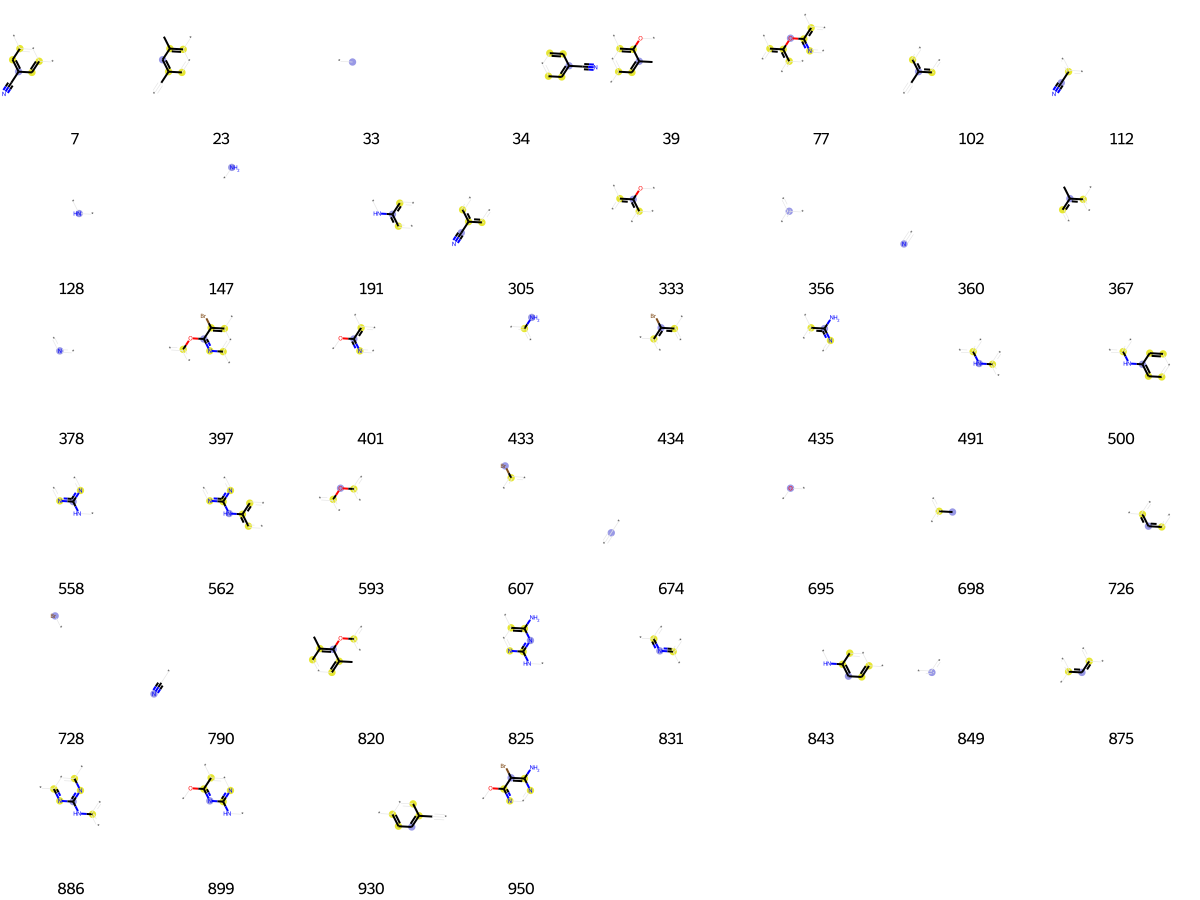

In [5595]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [5596]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[11,
 33,
 58,
 75,
 77,
 80,
 81,
 90,
 102,
 112,
 147,
 152,
 153,
 163,
 314,
 356,
 377,
 414,
 498,
 521,
 564,
 577,
 587,
 610,
 650,
 656,
 695,
 721,
 726,
 758,
 807,
 833,
 846,
 849,
 893,
 897,
 926,
 935,
 956,
 976,
 981,
 1017,
 1019]

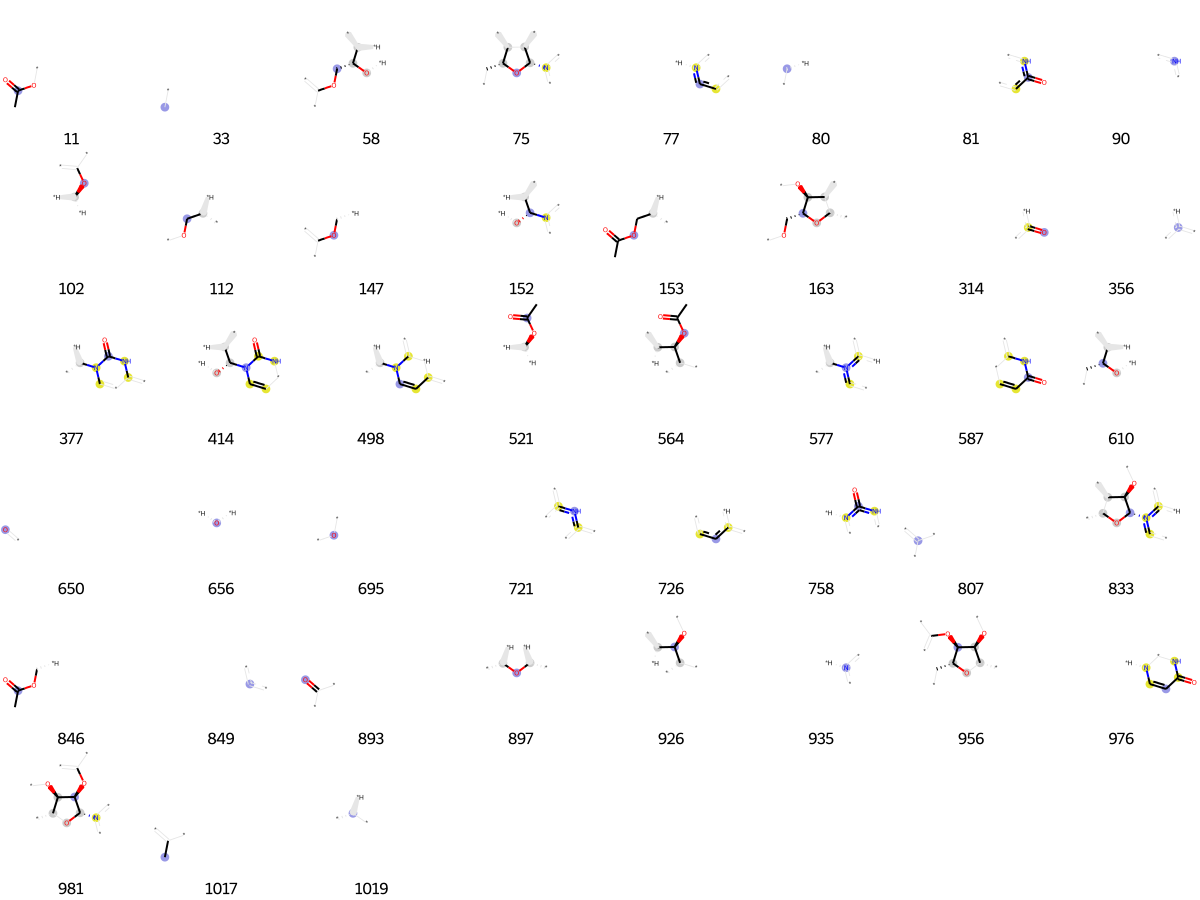

In [5597]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [5598]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[13,
 33,
 39,
 51,
 80,
 139,
 140,
 147,
 192,
 219,
 295,
 303,
 334,
 450,
 486,
 611,
 623,
 650,
 692,
 695,
 795,
 807,
 814,
 881,
 927]

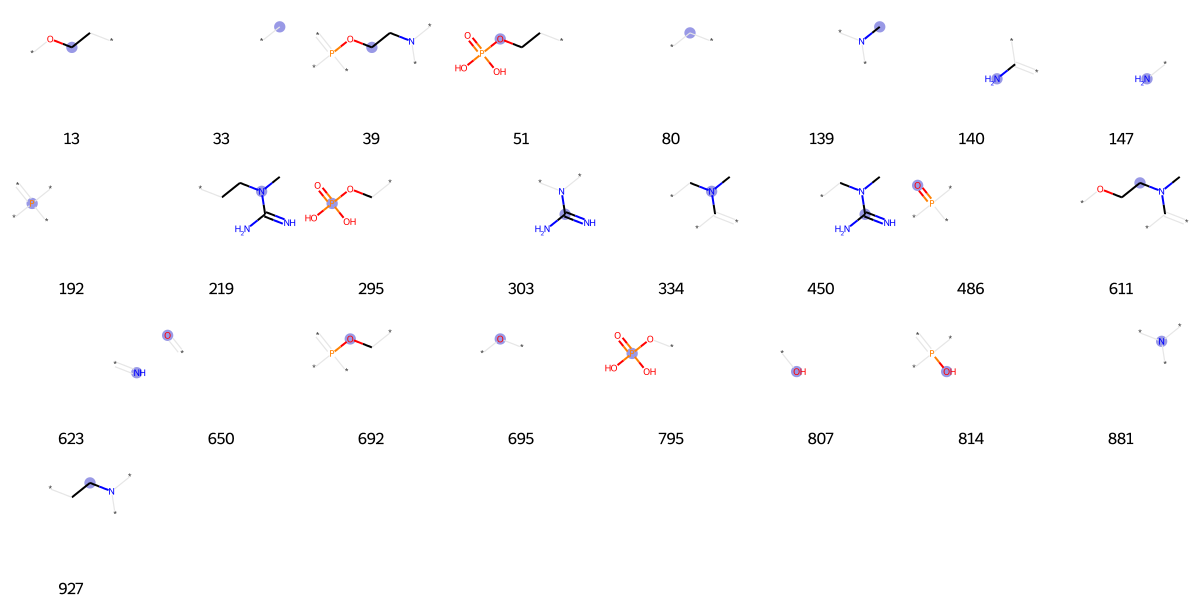

In [5599]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [5600]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[14,
 33,
 80,
 94,
 128,
 136,
 142,
 152,
 197,
 232,
 236,
 238,
 249,
 255,
 257,
 266,
 293,
 352,
 356,
 378,
 388,
 401,
 428,
 444,
 486,
 511,
 512,
 529,
 543,
 554,
 579,
 589,
 637,
 650,
 675,
 695,
 698,
 724,
 726,
 743,
 772,
 799,
 807,
 813,
 818,
 831,
 840,
 841,
 842,
 849,
 875,
 893,
 905,
 910,
 946,
 967,
 980,
 986,
 1003,
 1011]

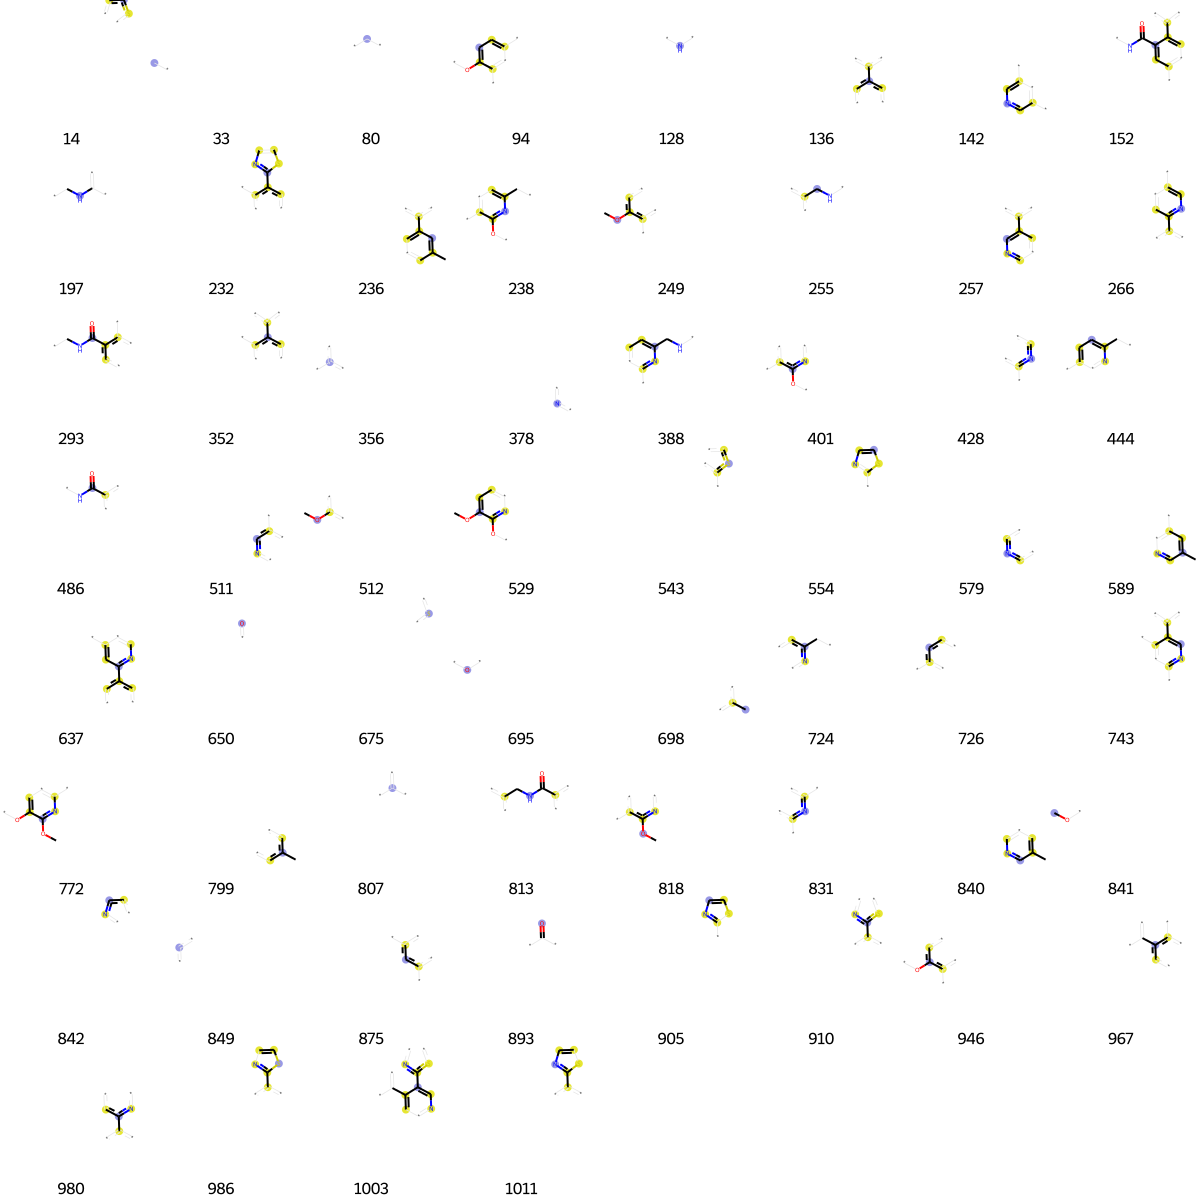

In [5601]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [5602]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[11,
 33,
 36,
 50,
 80,
 84,
 87,
 88,
 130,
 138,
 147,
 157,
 182,
 195,
 242,
 250,
 262,
 283,
 287,
 301,
 314,
 356,
 370,
 408,
 412,
 479,
 493,
 504,
 507,
 519,
 520,
 529,
 580,
 622,
 639,
 650,
 671,
 695,
 714,
 738,
 807,
 841,
 846,
 849,
 860,
 893,
 926,
 940,
 948,
 973,
 980,
 995,
 1017,
 1019]

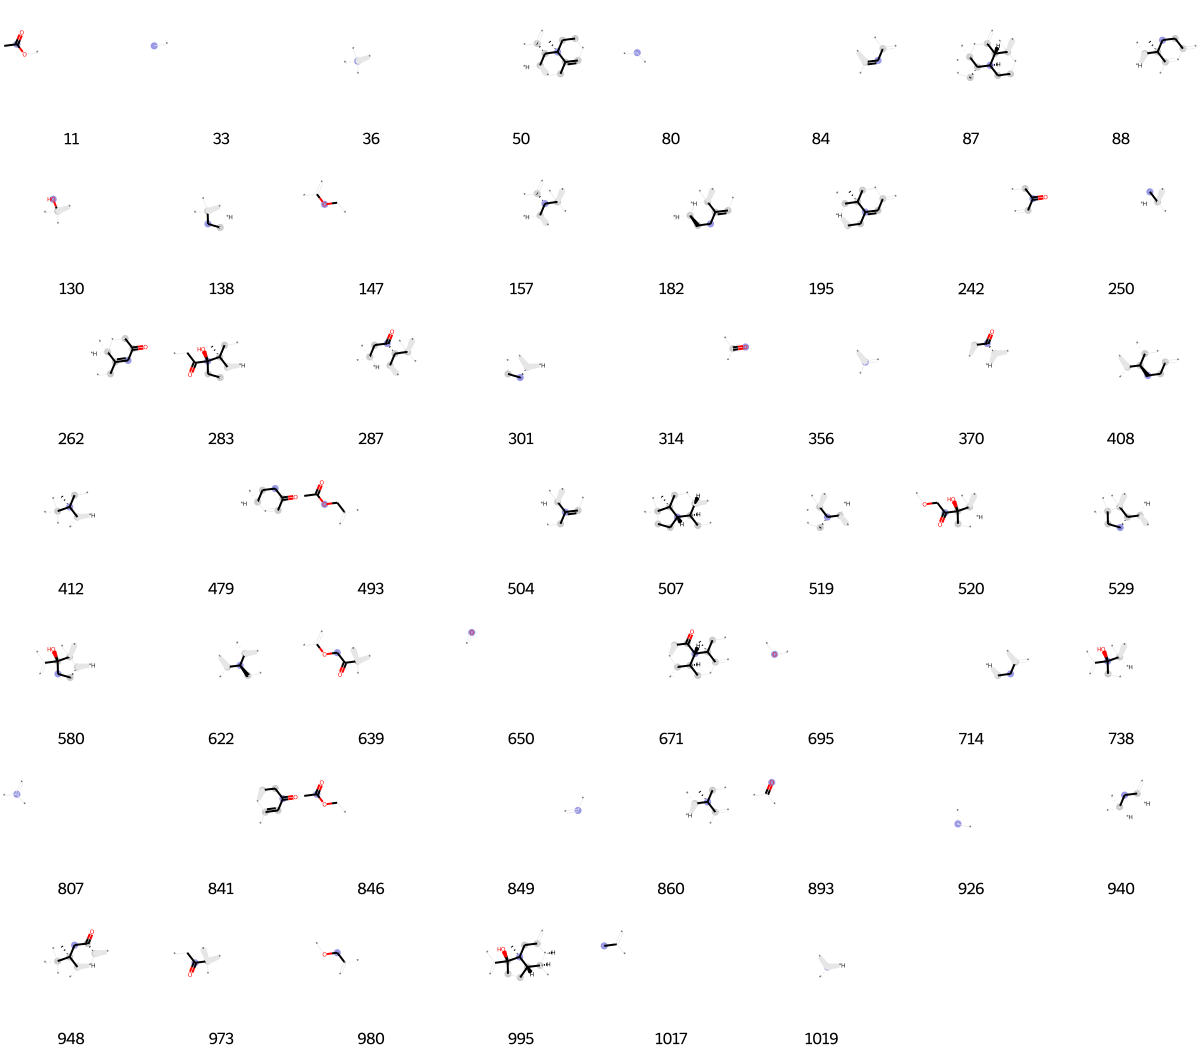

In [5603]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [5604]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[4,
 13,
 33,
 36,
 64,
 80,
 96,
 128,
 138,
 162,
 175,
 197,
 214,
 219,
 242,
 246,
 248,
 252,
 255,
 294,
 304,
 310,
 314,
 325,
 329,
 350,
 352,
 356,
 378,
 392,
 449,
 451,
 452,
 461,
 475,
 502,
 503,
 518,
 525,
 567,
 588,
 591,
 614,
 617,
 642,
 650,
 656,
 674,
 680,
 693,
 695,
 698,
 708,
 726,
 730,
 735,
 741,
 744,
 745,
 754,
 792,
 794,
 835,
 847,
 849,
 864,
 875,
 887,
 892,
 926,
 935,
 968,
 973,
 975,
 984,
 992]

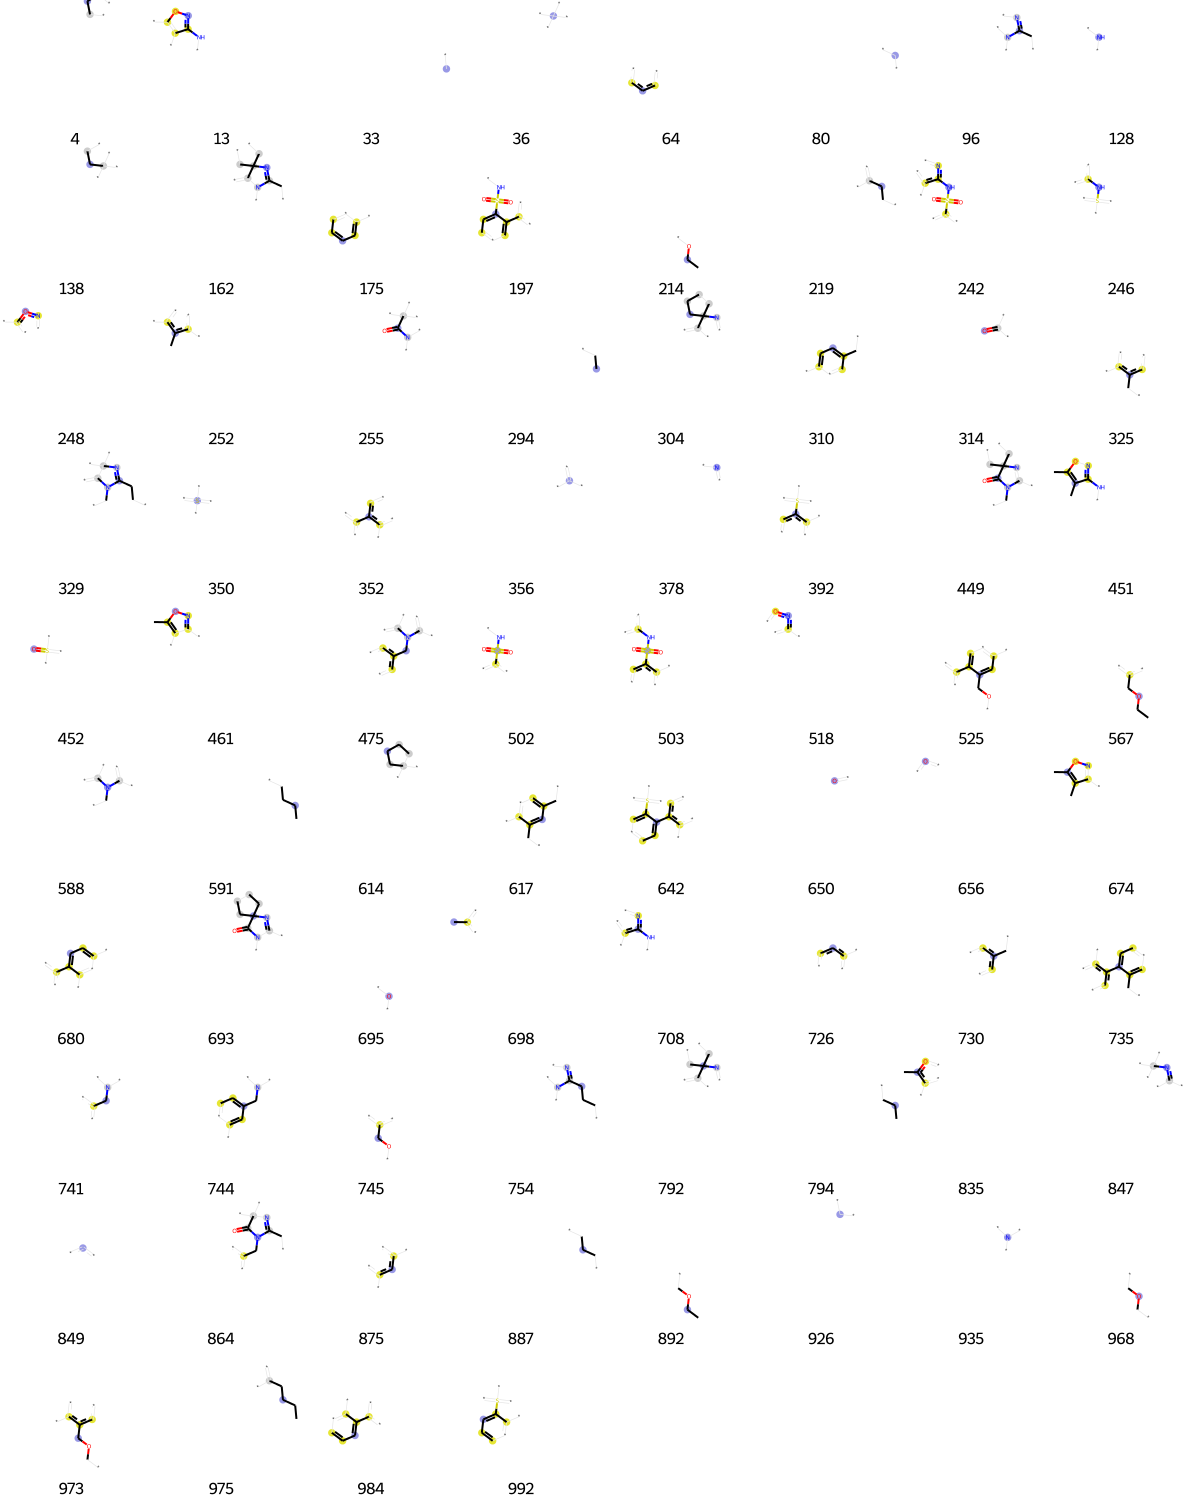

In [5605]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [5606]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 4,
 80,
 128,
 184,
 191,
 192,
 197,
 203,
 312,
 322,
 356,
 369,
 378,
 416,
 431,
 456,
 511,
 562,
 579,
 650,
 697,
 717,
 726,
 733,
 760,
 763,
 792,
 807,
 831,
 842,
 843,
 849,
 875,
 893,
 926,
 935,
 965,
 966,
 974,
 985,
 1009]

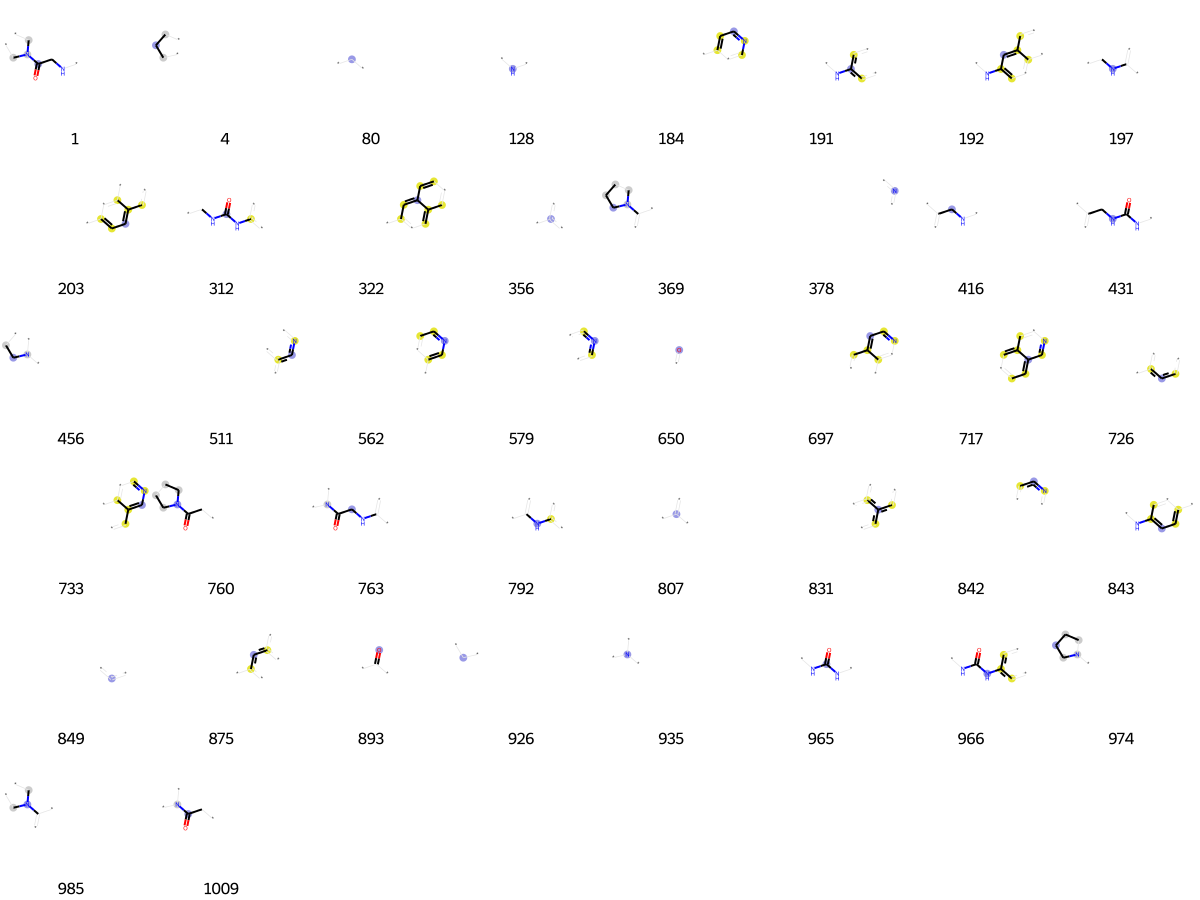

In [5607]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [5608]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 4,
 21,
 33,
 79,
 80,
 90,
 108,
 117,
 121,
 128,
 140,
 147,
 193,
 231,
 242,
 282,
 301,
 314,
 320,
 354,
 356,
 362,
 378,
 401,
 405,
 409,
 411,
 428,
 446,
 456,
 457,
 488,
 531,
 555,
 564,
 575,
 600,
 609,
 625,
 650,
 652,
 689,
 713,
 724,
 734,
 736,
 798,
 807,
 837,
 849,
 855,
 893,
 926,
 931,
 935,
 987,
 1019]

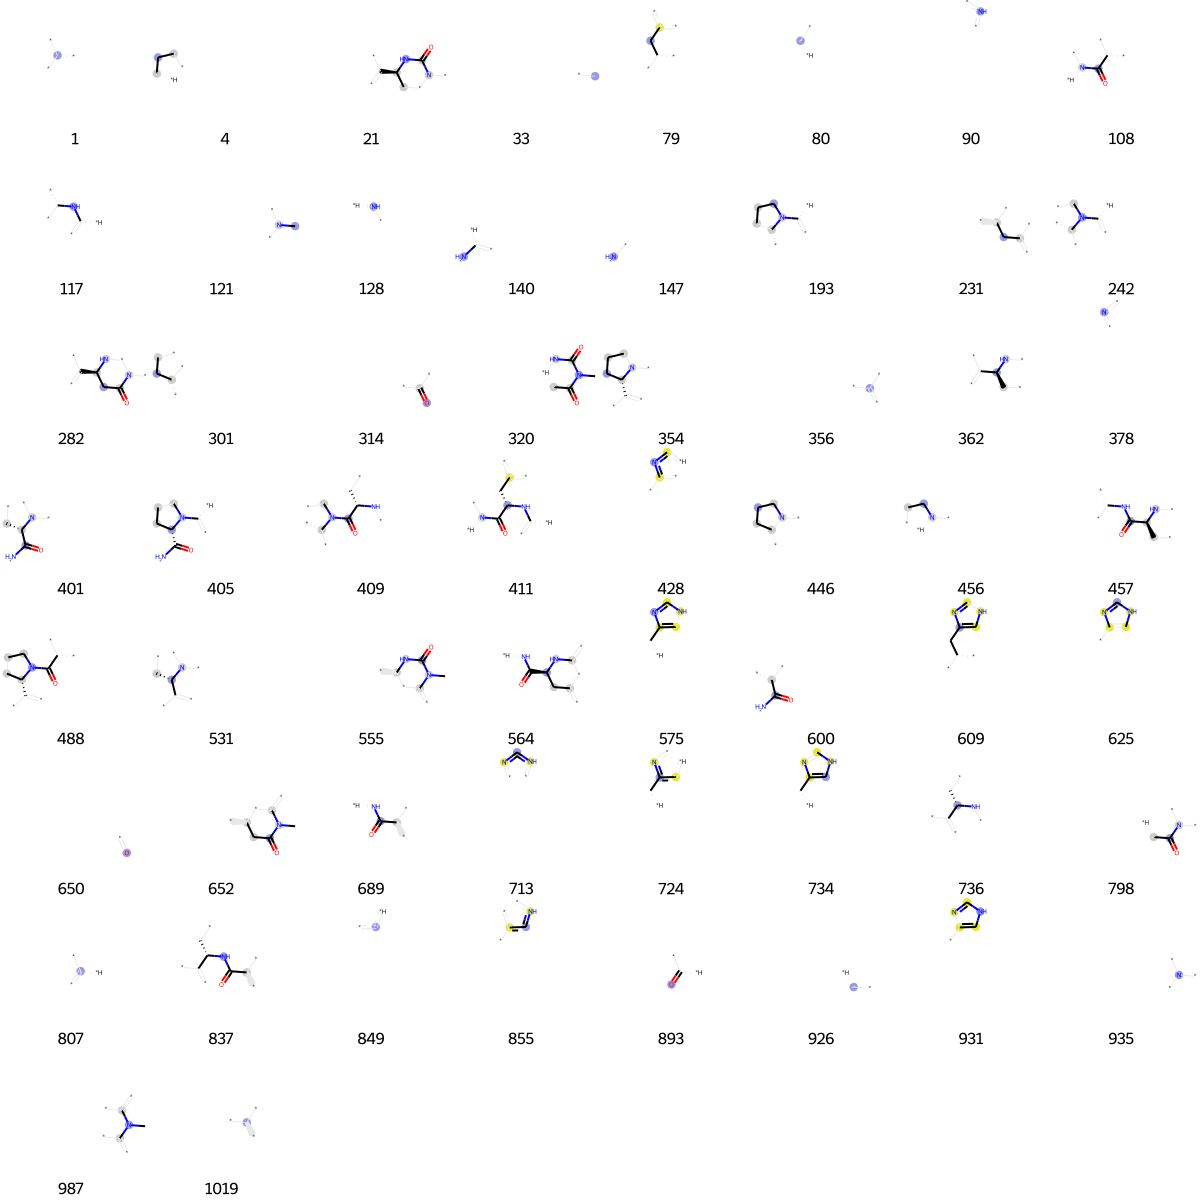

In [5609]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [5610]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 33,
 36,
 57,
 65,
 84,
 118,
 138,
 166,
 232,
 250,
 285,
 298,
 312,
 314,
 325,
 352,
 353,
 356,
 361,
 367,
 426,
 441,
 444,
 452,
 558,
 614,
 649,
 650,
 656,
 680,
 698,
 714,
 723,
 726,
 784,
 849,
 887,
 899,
 926,
 953,
 956,
 1019]

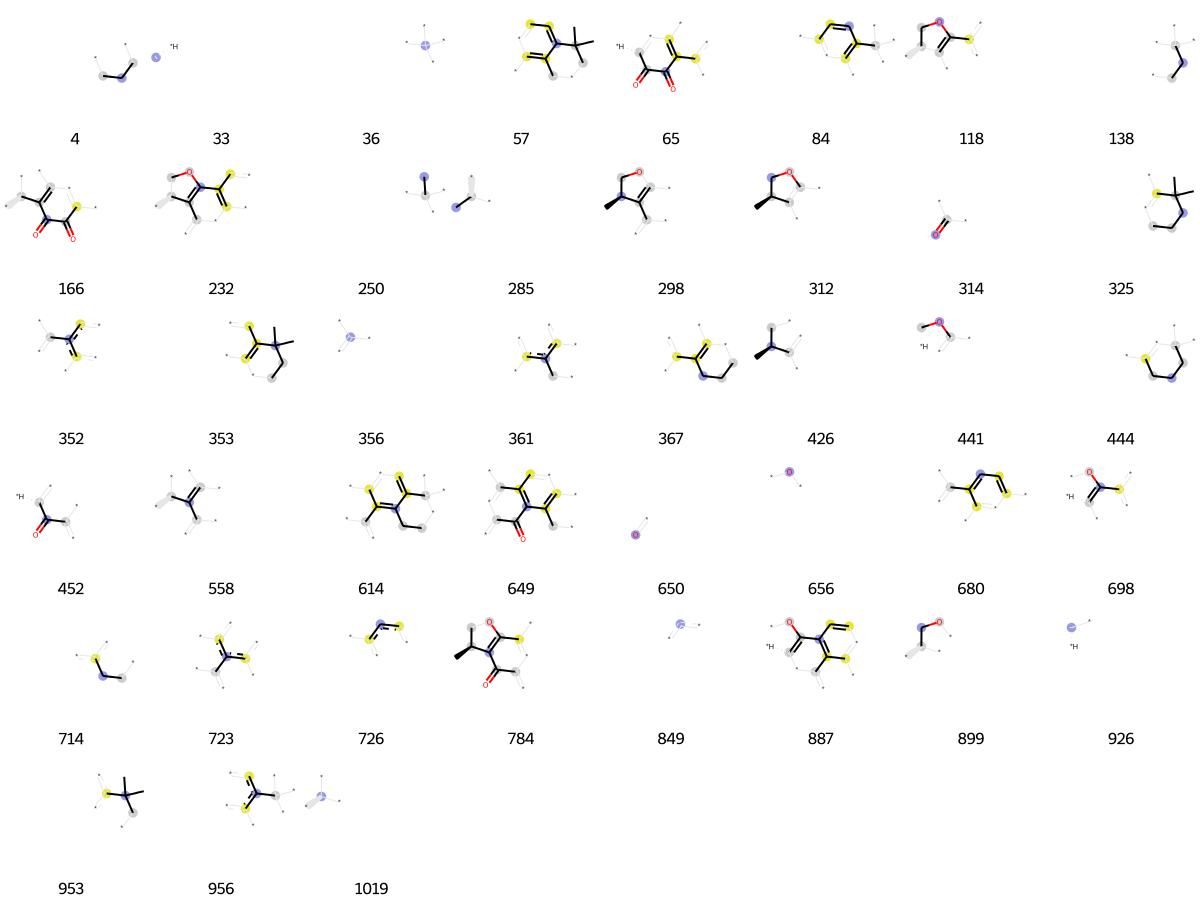

In [5611]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [5612]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[9,
 20,
 33,
 73,
 110,
 128,
 140,
 147,
 200,
 230,
 240,
 249,
 272,
 301,
 309,
 322,
 333,
 336,
 346,
 356,
 366,
 378,
 387,
 400,
 410,
 412,
 428,
 430,
 512,
 561,
 573,
 593,
 610,
 613,
 631,
 647,
 650,
 659,
 673,
 695,
 718,
 726,
 780,
 787,
 792,
 807,
 832,
 841,
 842,
 849,
 875,
 888,
 893,
 926,
 946,
 965,
 967,
 1018,
 1019]

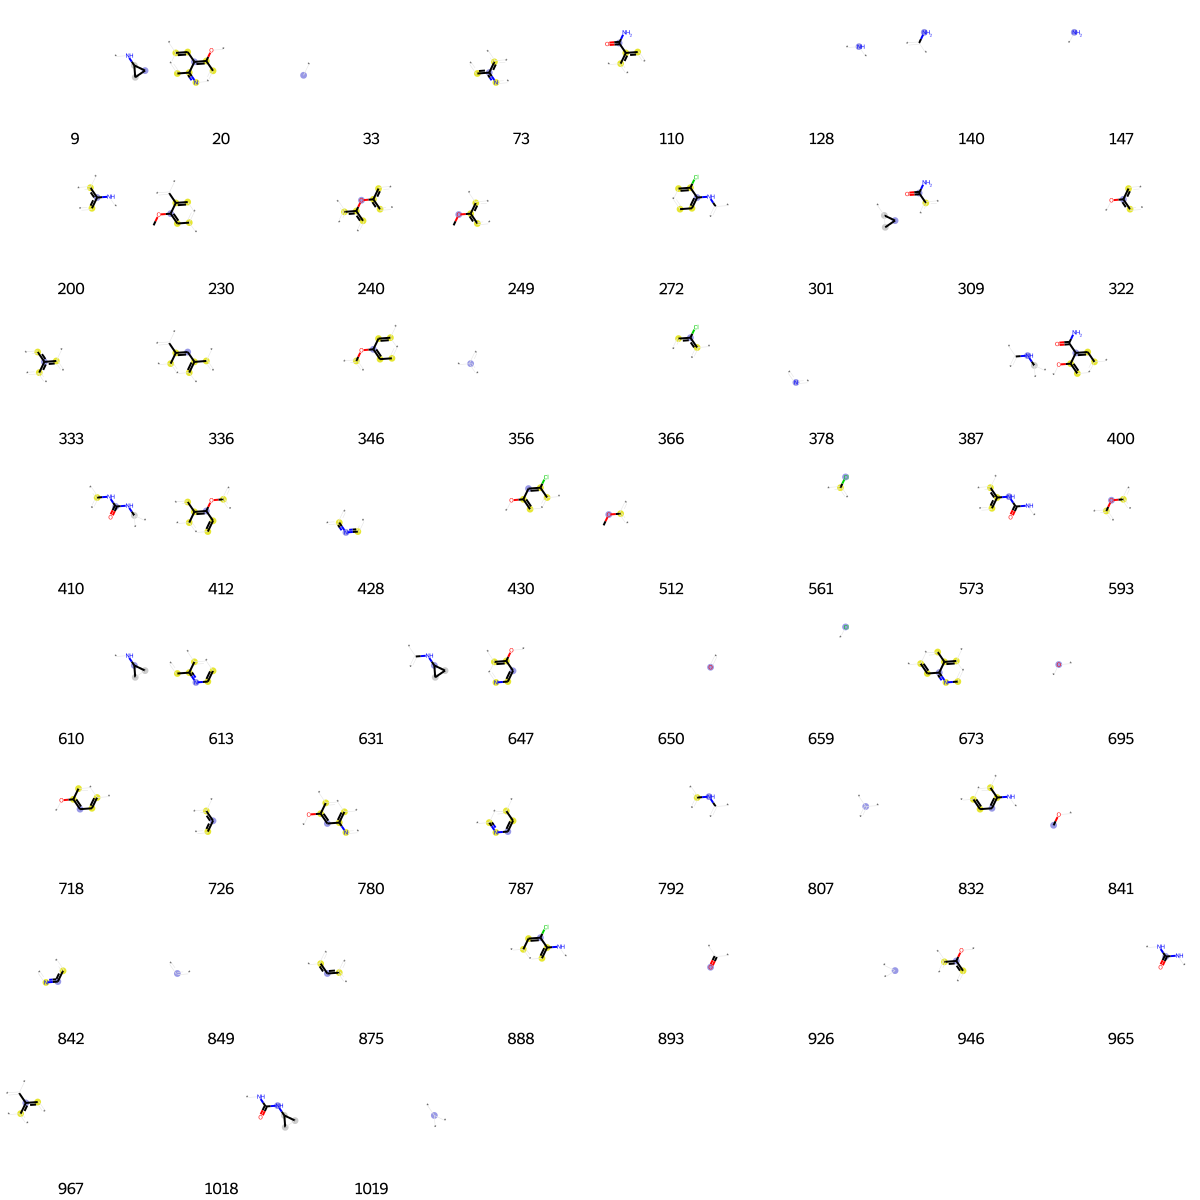

In [5613]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [5614]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 80,
 147,
 227,
 315,
 338,
 341,
 356,
 378,
 410,
 451,
 578,
 583,
 589,
 726,
 760,
 780,
 807,
 829,
 849,
 875,
 885,
 981]

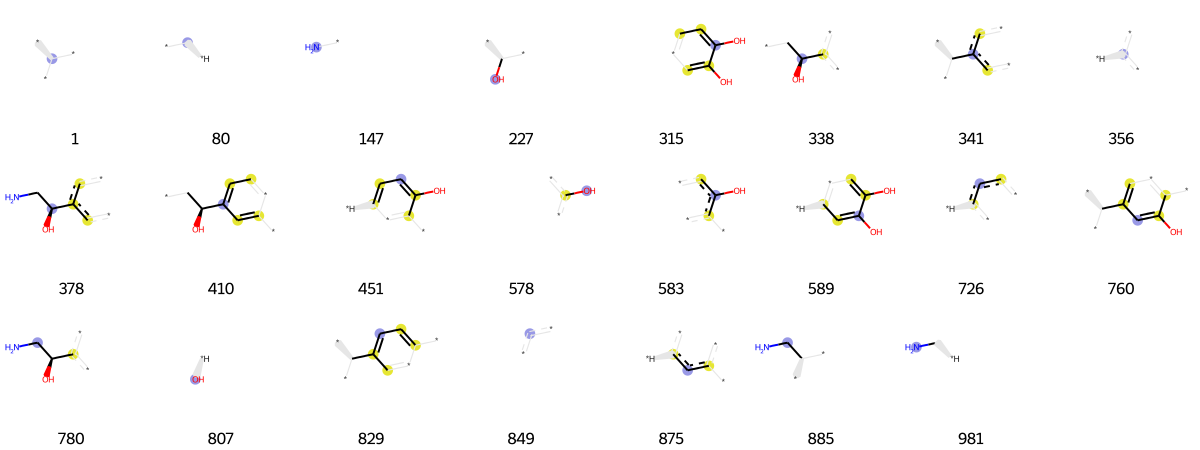

In [5615]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [5616]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[9,
 14,
 16,
 33,
 64,
 73,
 79,
 90,
 119,
 128,
 170,
 241,
 343,
 356,
 361,
 373,
 378,
 383,
 419,
 444,
 543,
 594,
 650,
 673,
 675,
 695,
 721,
 726,
 734,
 767,
 790,
 792,
 807,
 831,
 841,
 849,
 875,
 884,
 893,
 915,
 933,
 961,
 974,
 1011]

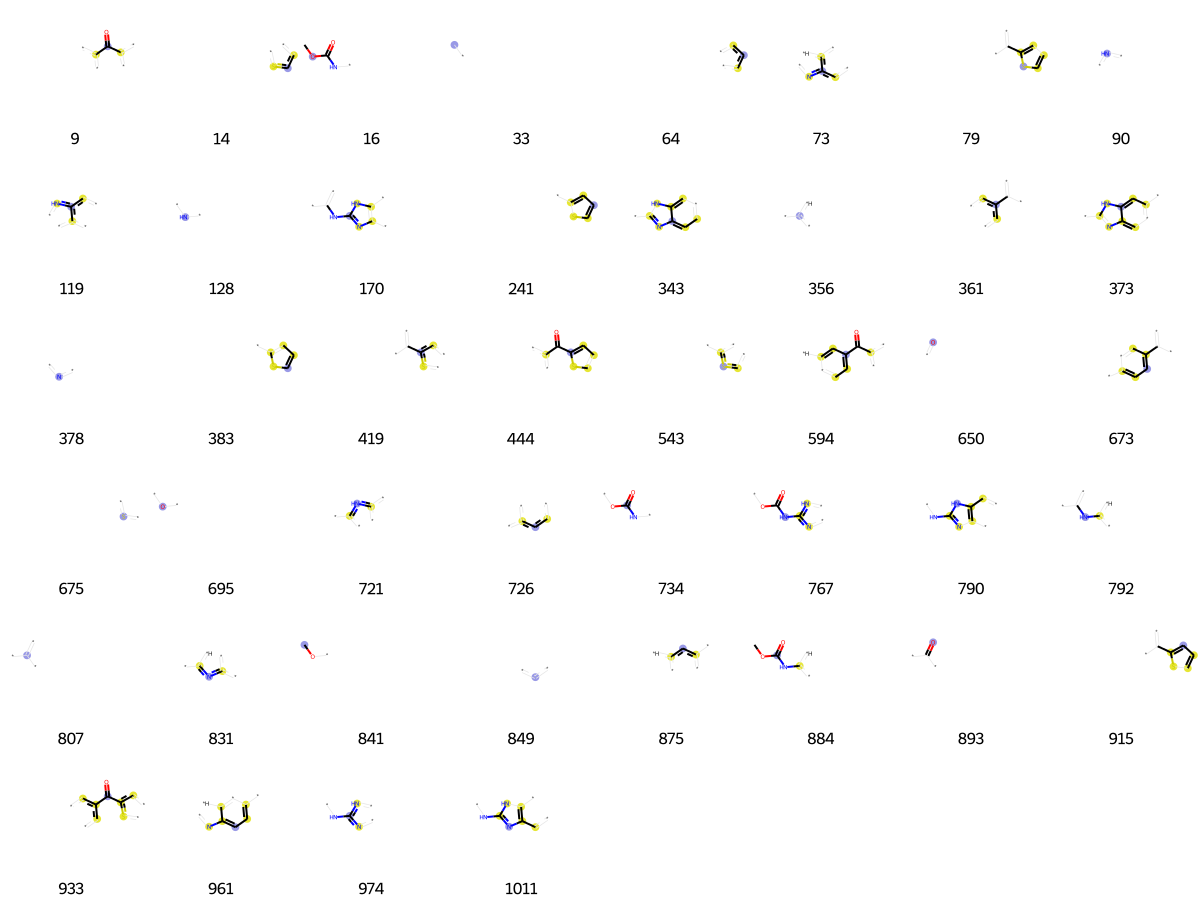

In [5617]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [5618]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[2,
 4,
 33,
 128,
 166,
 235,
 307,
 319,
 331,
 350,
 356,
 452,
 456,
 502,
 516,
 582,
 650,
 698,
 715,
 726,
 772,
 799,
 807,
 836,
 849,
 850,
 883,
 893,
 896,
 926,
 935,
 965,
 974]

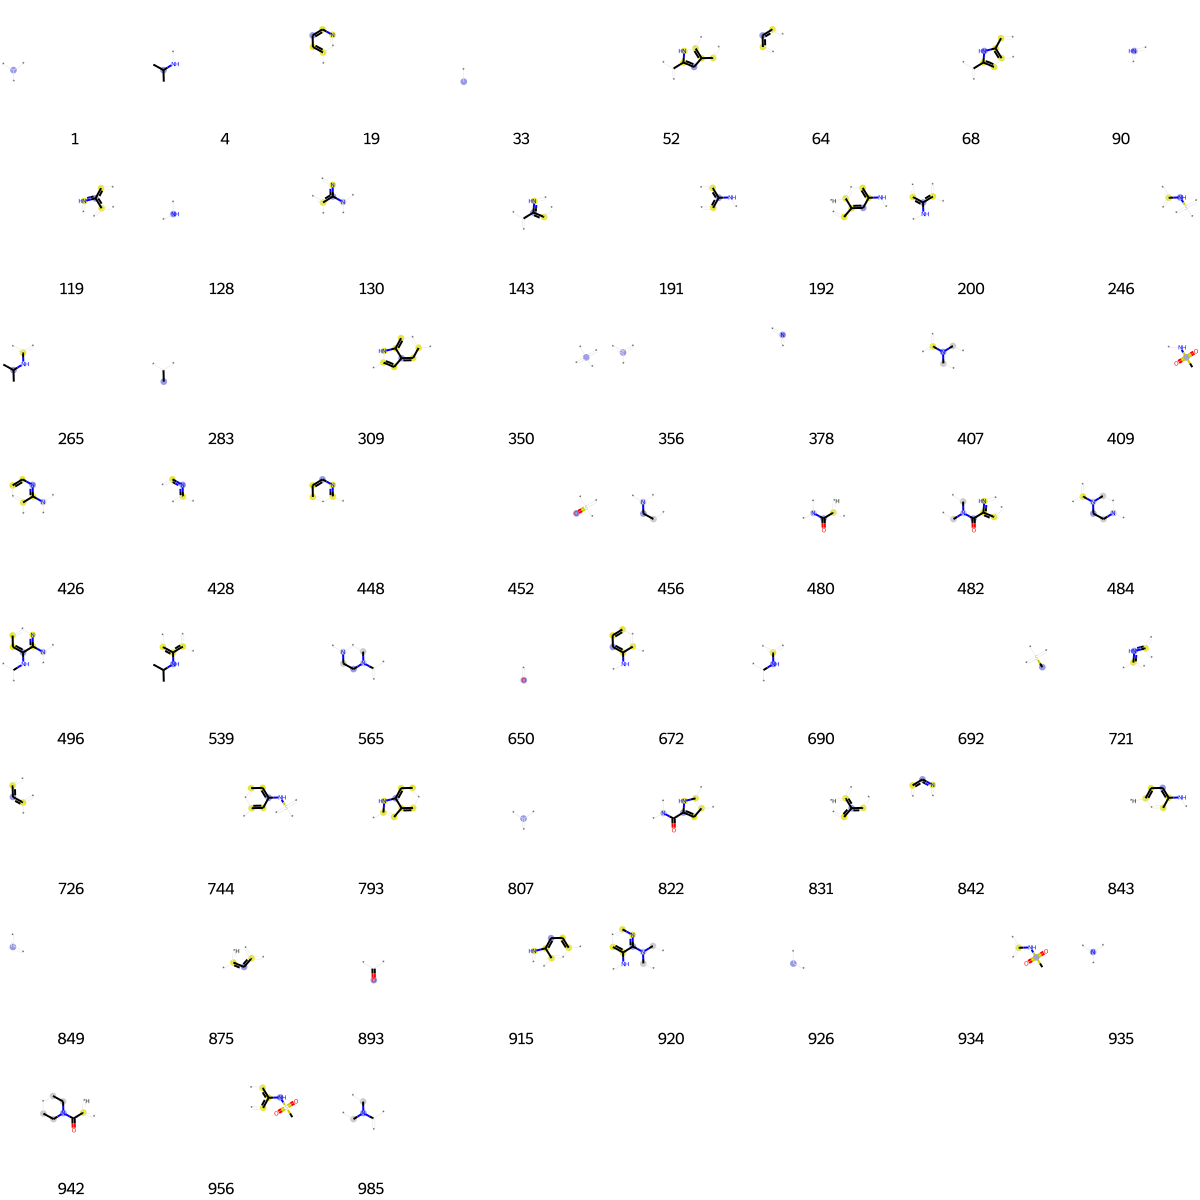

In [5619]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [5620]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 4,
 33,
 36,
 80,
 90,
 99,
 114,
 117,
 128,
 138,
 140,
 147,
 165,
 168,
 197,
 283,
 294,
 295,
 310,
 320,
 325,
 341,
 344,
 354,
 356,
 366,
 369,
 386,
 407,
 427,
 536,
 544,
 560,
 573,
 594,
 611,
 614,
 623,
 646,
 650,
 667,
 699,
 708,
 726,
 736,
 739,
 803,
 807,
 829,
 849,
 852,
 883,
 887,
 893,
 894,
 899,
 904,
 926,
 927,
 964,
 979,
 983,
 997,
 1021]

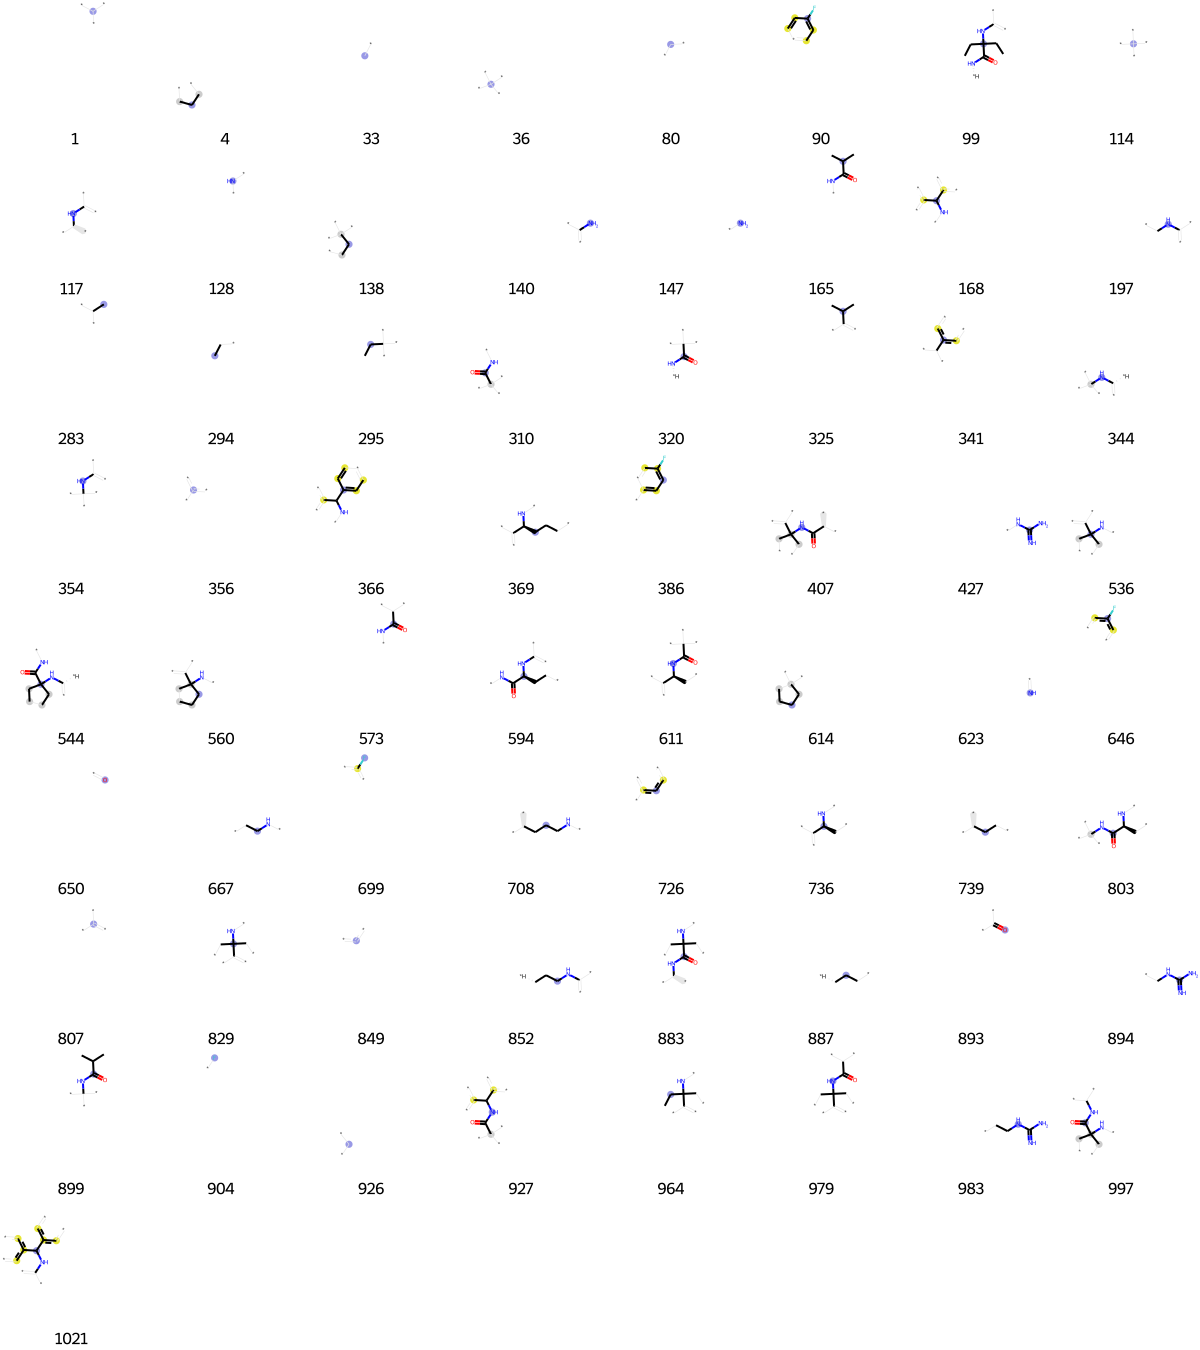

In [5621]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [5622]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 15,
 33,
 56,
 63,
 64,
 90,
 142,
 249,
 280,
 284,
 285,
 305,
 350,
 354,
 356,
 367,
 373,
 378,
 392,
 452,
 456,
 470,
 511,
 579,
 589,
 649,
 650,
 662,
 688,
 698,
 726,
 733,
 734,
 794,
 800,
 816,
 831,
 849,
 897,
 915,
 926,
 935,
 960,
 992,
 1019]

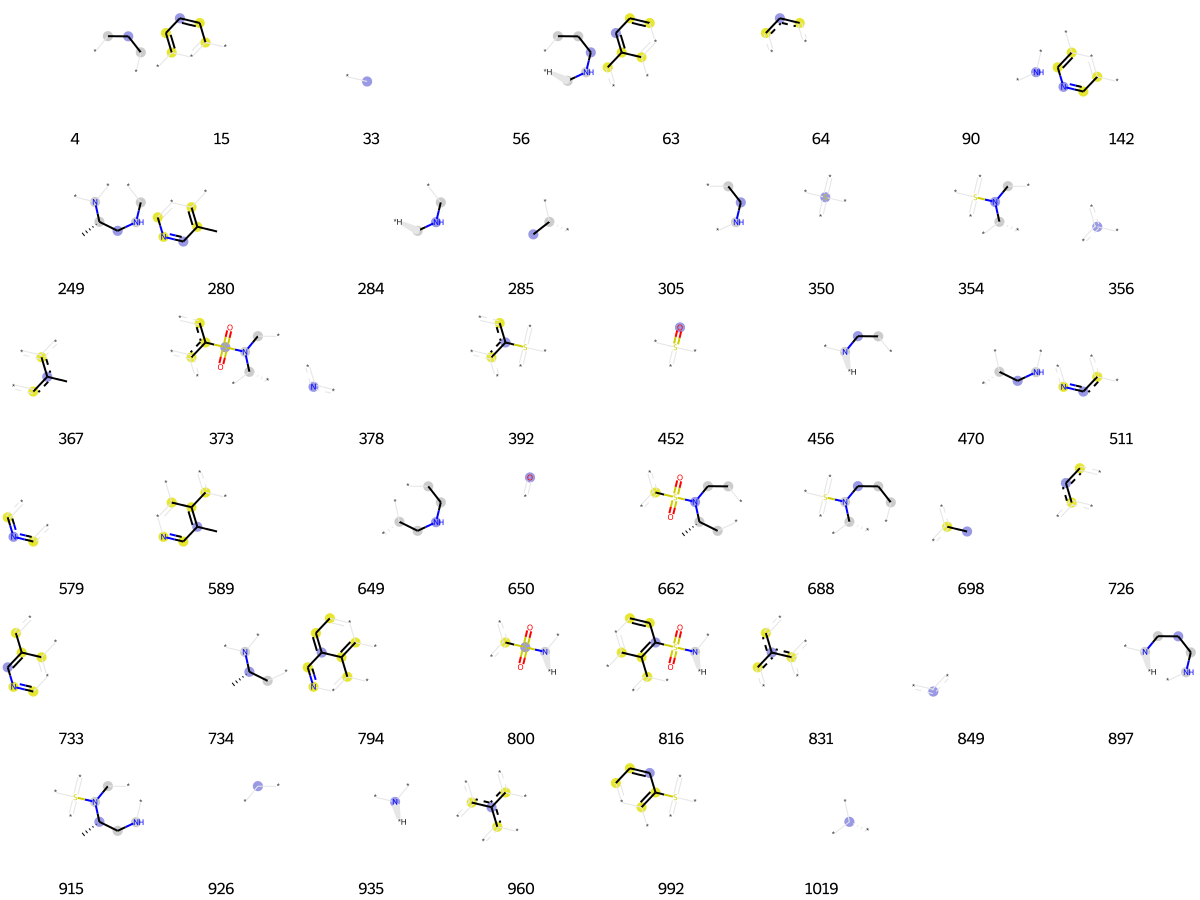

In [5623]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [5624]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 4,
 15,
 33,
 63,
 64,
 80,
 87,
 89,
 105,
 112,
 114,
 118,
 128,
 175,
 203,
 213,
 227,
 310,
 322,
 329,
 356,
 358,
 360,
 363,
 366,
 386,
 392,
 428,
 430,
 535,
 561,
 598,
 606,
 631,
 658,
 659,
 667,
 674,
 687,
 695,
 726,
 730,
 762,
 790,
 794,
 807,
 831,
 849,
 875,
 888,
 946,
 974,
 1014]

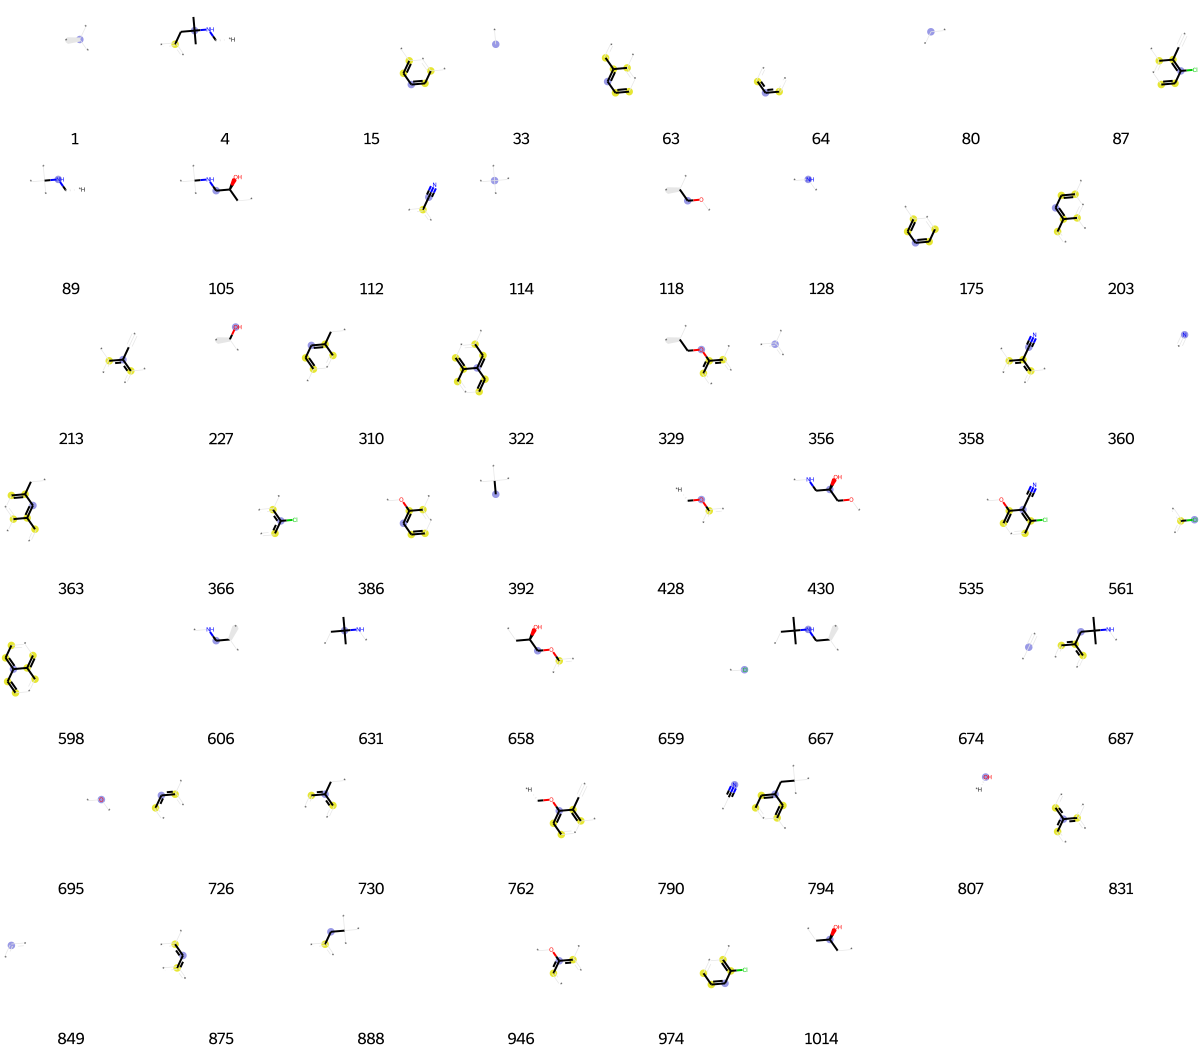

In [5625]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [5626]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[80,
 90,
 119,
 144,
 147,
 219,
 289,
 325,
 328,
 332,
 333,
 356,
 364,
 381,
 387,
 476,
 578,
 726,
 728,
 745,
 806,
 807,
 816,
 849,
 855,
 875,
 913,
 915,
 981]

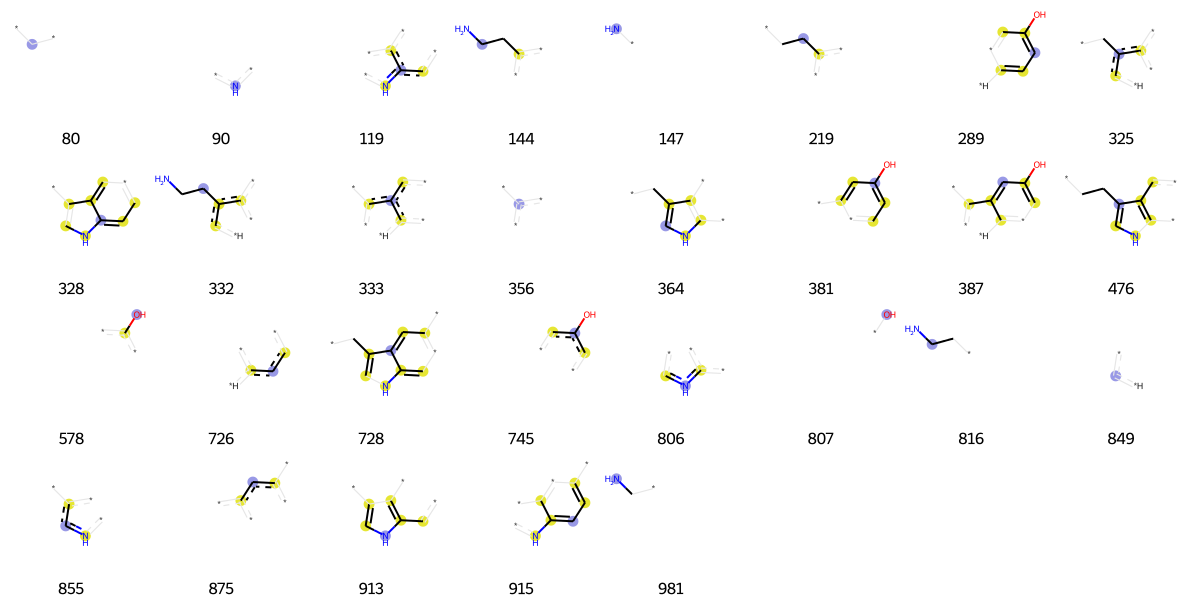

In [5627]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [5628]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[3,
 33,
 90,
 119,
 121,
 128,
 184,
 191,
 207,
 212,
 297,
 301,
 328,
 333,
 356,
 361,
 386,
 456,
 486,
 558,
 641,
 646,
 650,
 673,
 699,
 726,
 771,
 792,
 802,
 806,
 807,
 843,
 849,
 855,
 875,
 893,
 904,
 913,
 915,
 922,
 924,
 926,
 934,
 935,
 954,
 976,
 993,
 1019]

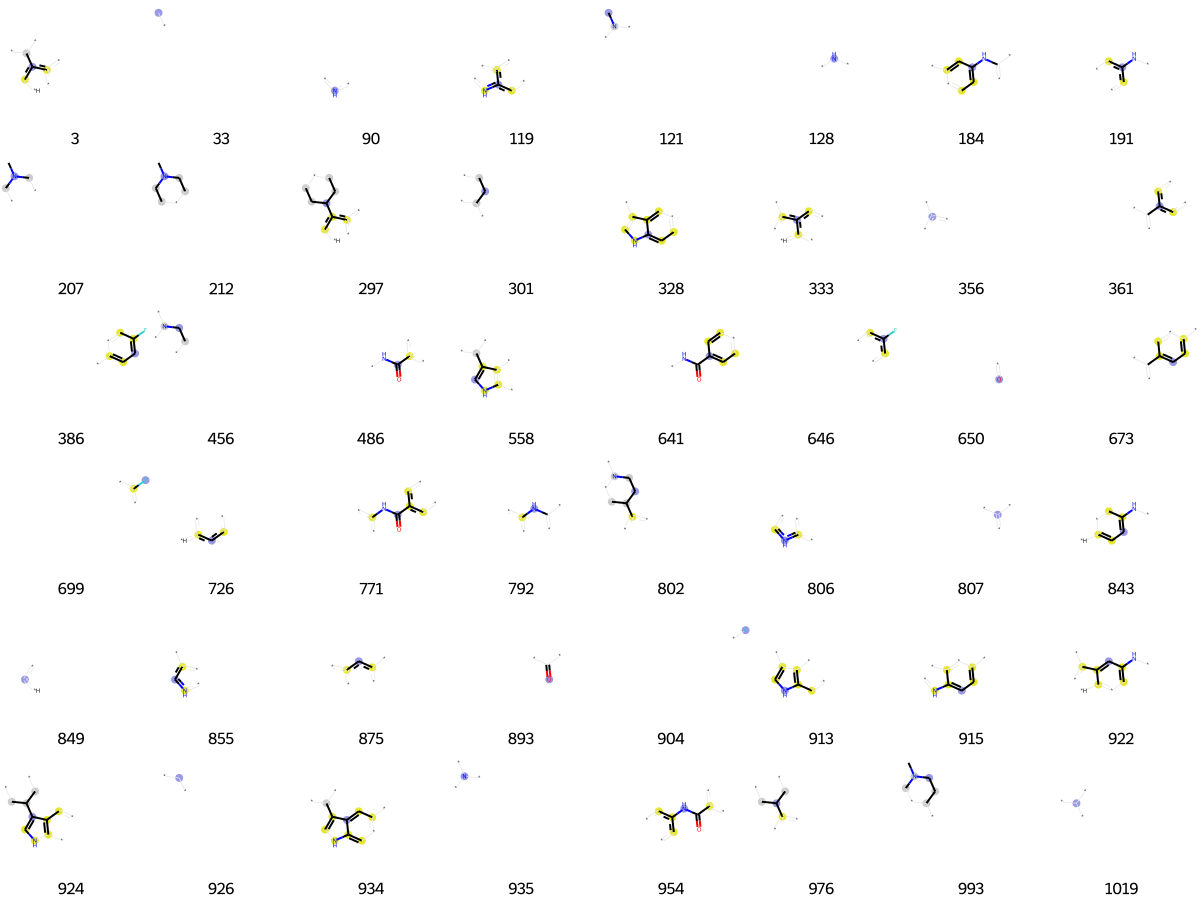

In [5629]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [5630]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[27,
 41,
 53,
 63,
 64,
 80,
 102,
 114,
 128,
 136,
 147,
 175,
 181,
 191,
 203,
 204,
 233,
 304,
 305,
 319,
 333,
 356,
 368,
 375,
 378,
 410,
 416,
 429,
 503,
 549,
 641,
 650,
 668,
 709,
 726,
 753,
 792,
 801,
 807,
 809,
 828,
 831,
 836,
 843,
 849,
 875,
 893,
 896,
 901,
 904,
 932,
 935,
 981]

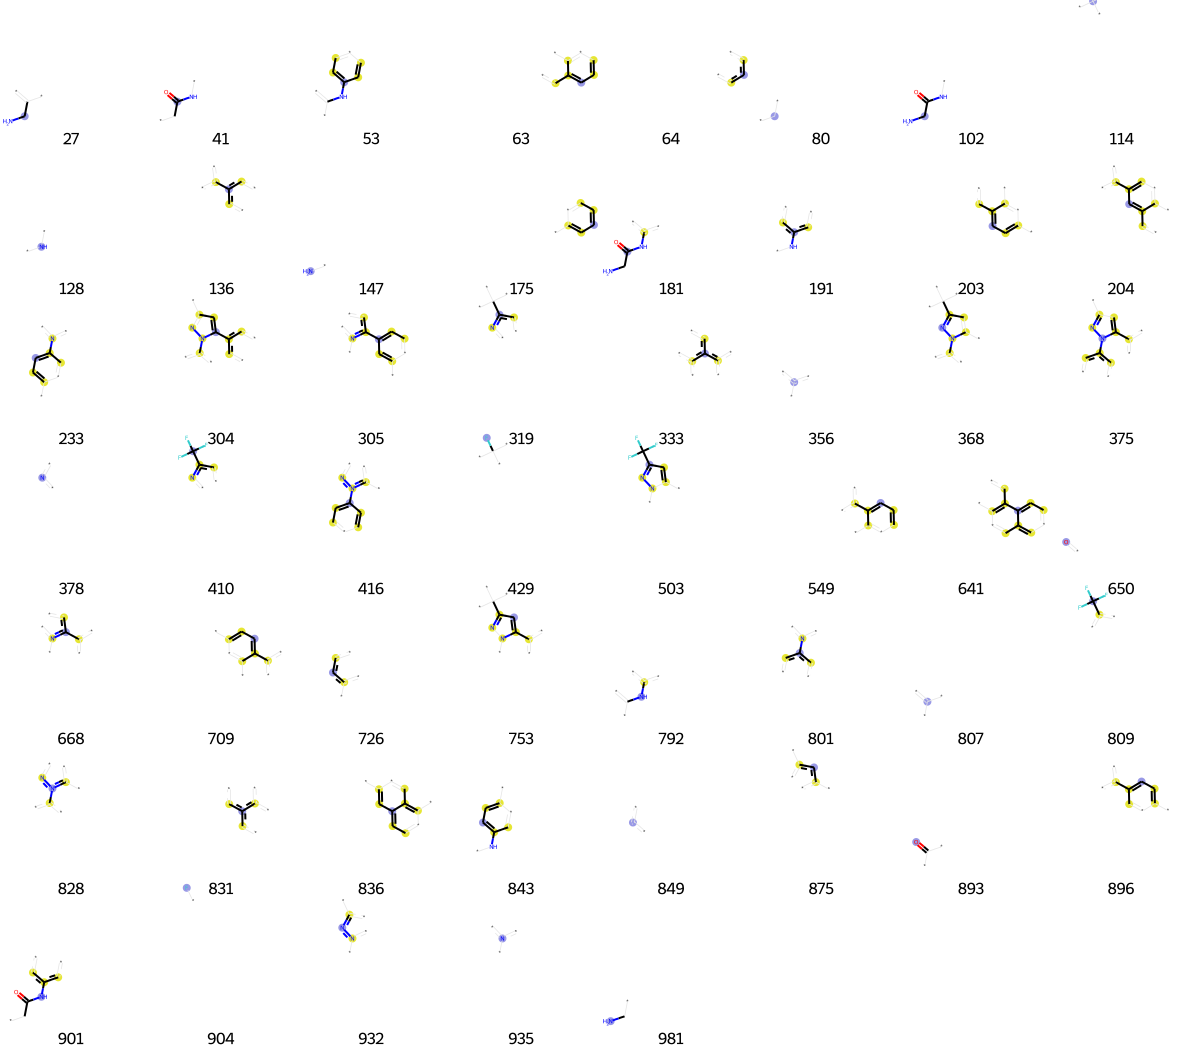

In [5631]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [5632]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[1,
 33,
 114,
 122,
 128,
 283,
 307,
 322,
 341,
 350,
 356,
 389,
 409,
 429,
 452,
 573,
 574,
 650,
 673,
 692,
 695,
 718,
 726,
 806,
 807,
 828,
 829,
 849,
 852,
 872,
 893,
 900,
 904,
 967,
 1002]

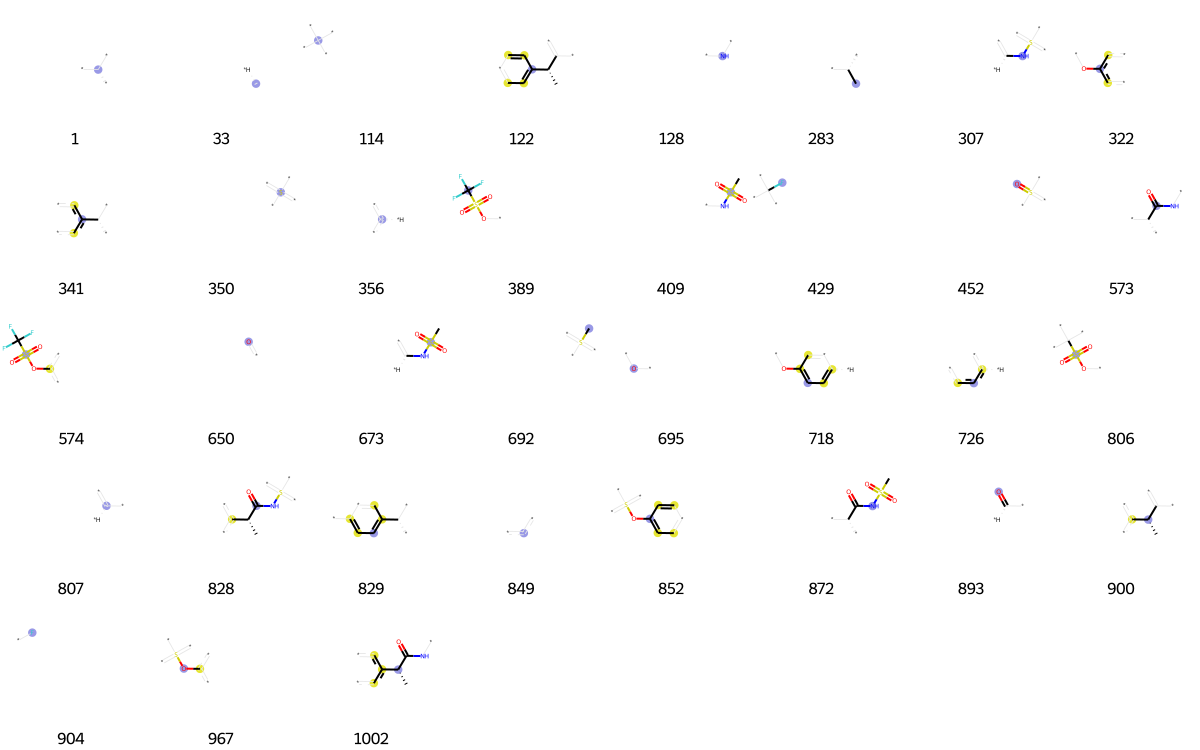

In [5633]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [5634]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 9,
 10,
 29,
 32,
 33,
 73,
 80,
 91,
 119,
 128,
 136,
 138,
 139,
 168,
 197,
 202,
 257,
 301,
 303,
 323,
 356,
 366,
 378,
 381,
 428,
 437,
 464,
 511,
 561,
 565,
 578,
 610,
 645,
 647,
 650,
 652,
 659,
 700,
 726,
 796,
 807,
 829,
 831,
 834,
 849,
 875,
 881,
 893,
 894,
 926,
 942,
 954,
 961,
 967,
 980,
 1012,
 1017,
 1019]

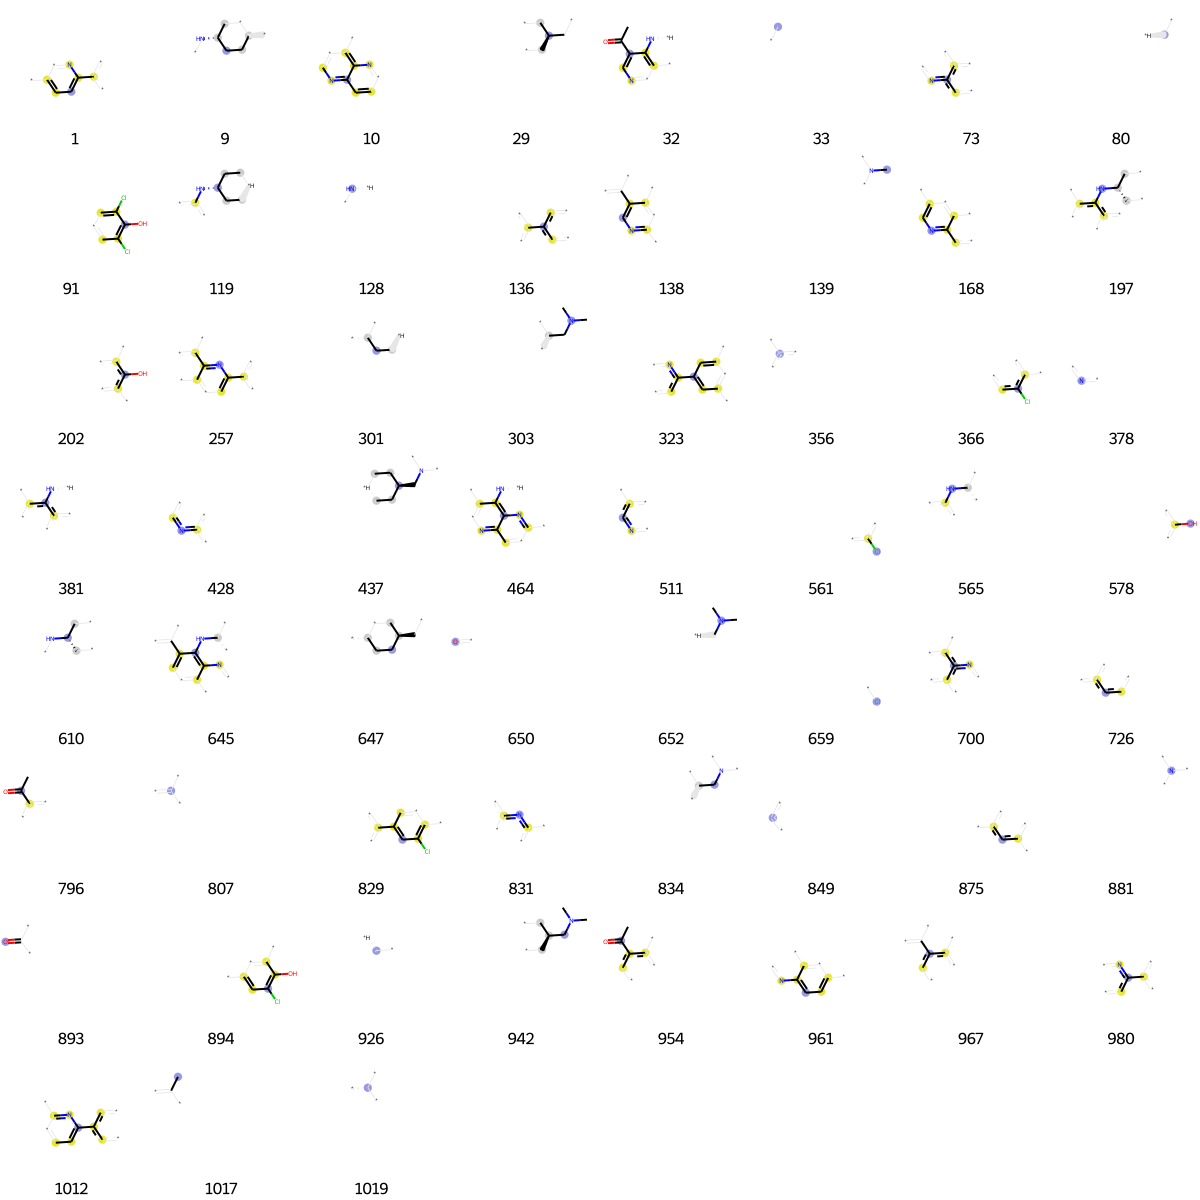

In [5635]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [5636]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 9,
 64,
 116,
 121,
 142,
 171,
 175,
 189,
 194,
 214,
 290,
 324,
 329,
 354,
 356,
 378,
 418,
 443,
 463,
 518,
 545,
 548,
 552,
 580,
 650,
 656,
 700,
 715,
 716,
 726,
 753,
 838,
 849,
 870,
 894,
 911,
 939,
 1003,
 1007]

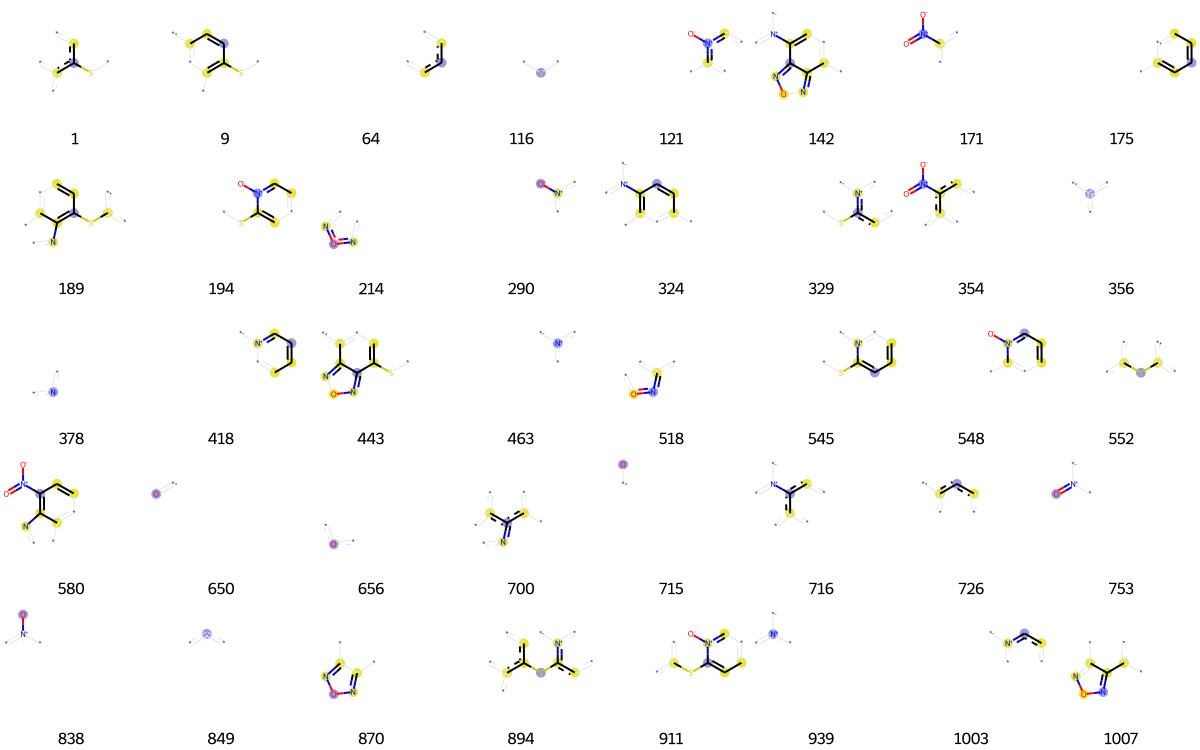

In [5637]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [5638]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[15,
 21,
 32,
 33,
 64,
 80,
 94,
 102,
 111,
 119,
 121,
 128,
 136,
 139,
 140,
 147,
 175,
 197,
 200,
 222,
 237,
 270,
 301,
 310,
 334,
 352,
 356,
 361,
 386,
 389,
 456,
 458,
 587,
 600,
 640,
 650,
 659,
 663,
 672,
 673,
 695,
 726,
 729,
 730,
 734,
 736,
 741,
 747,
 767,
 784,
 792,
 807,
 813,
 827,
 849,
 881,
 893,
 926,
 927,
 935,
 959,
 974,
 984,
 1013,
 1019]

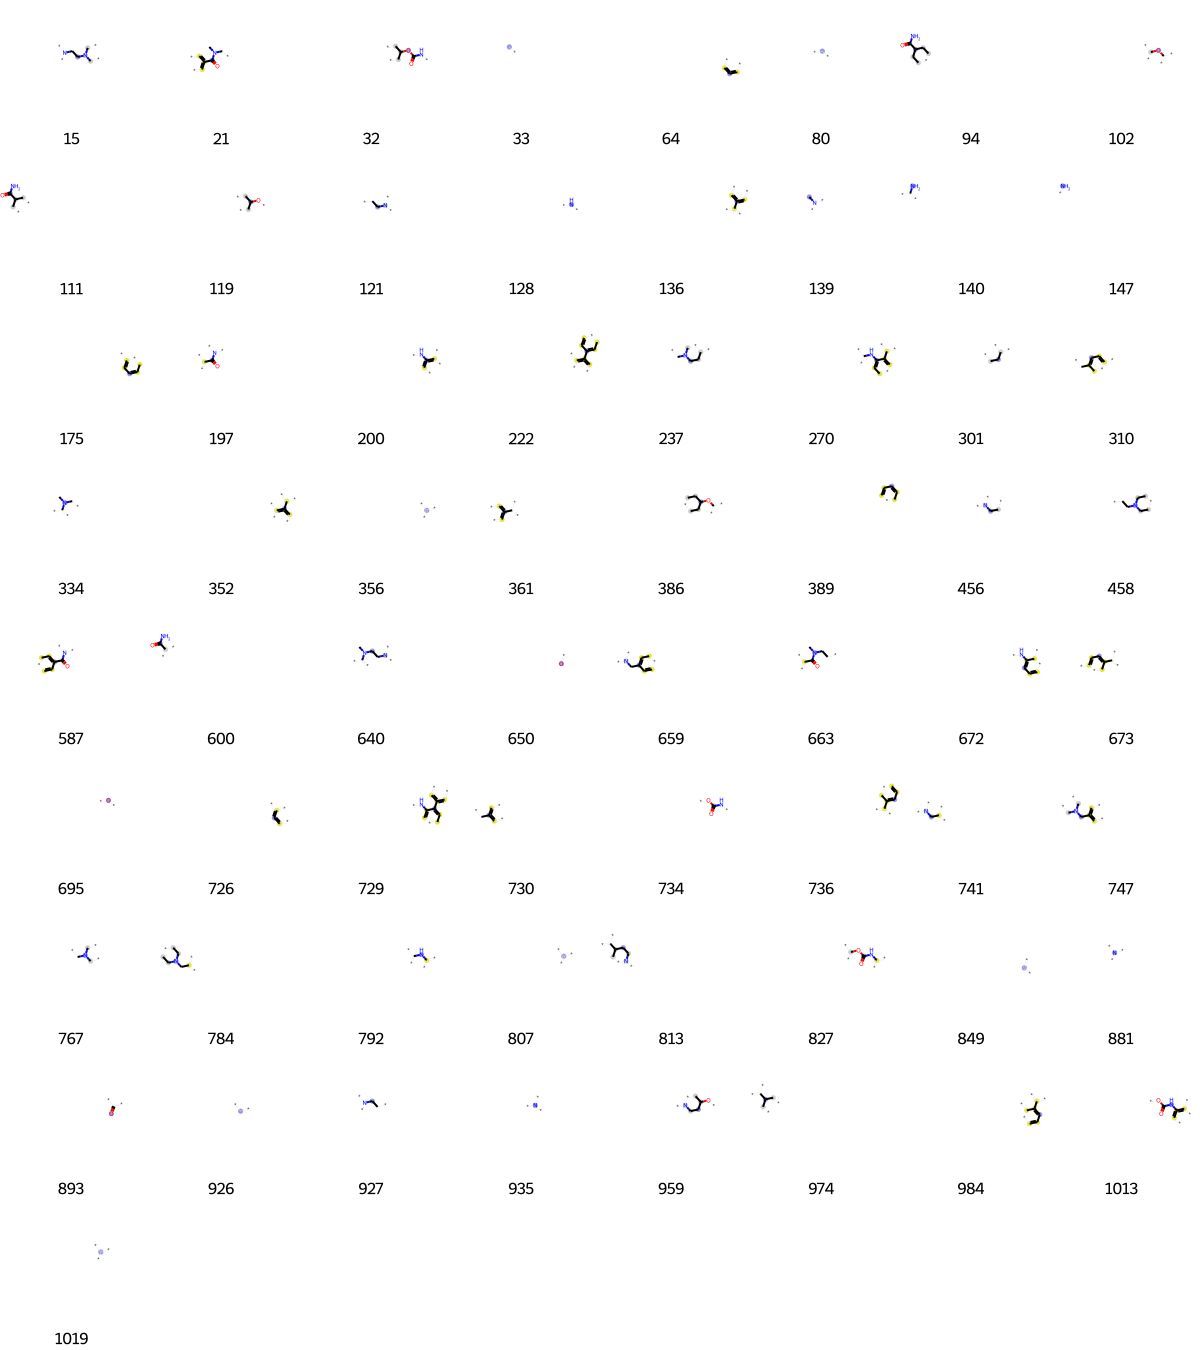

In [5639]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [5640]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[3,
 25,
 36,
 90,
 136,
 151,
 190,
 210,
 215,
 217,
 258,
 273,
 281,
 284,
 305,
 314,
 346,
 352,
 356,
 372,
 378,
 407,
 424,
 428,
 456,
 463,
 492,
 511,
 527,
 531,
 544,
 632,
 633,
 635,
 650,
 675,
 694,
 726,
 749,
 750,
 804,
 806,
 807,
 849,
 855,
 875,
 896,
 926,
 935,
 996,
 1009,
 1020]

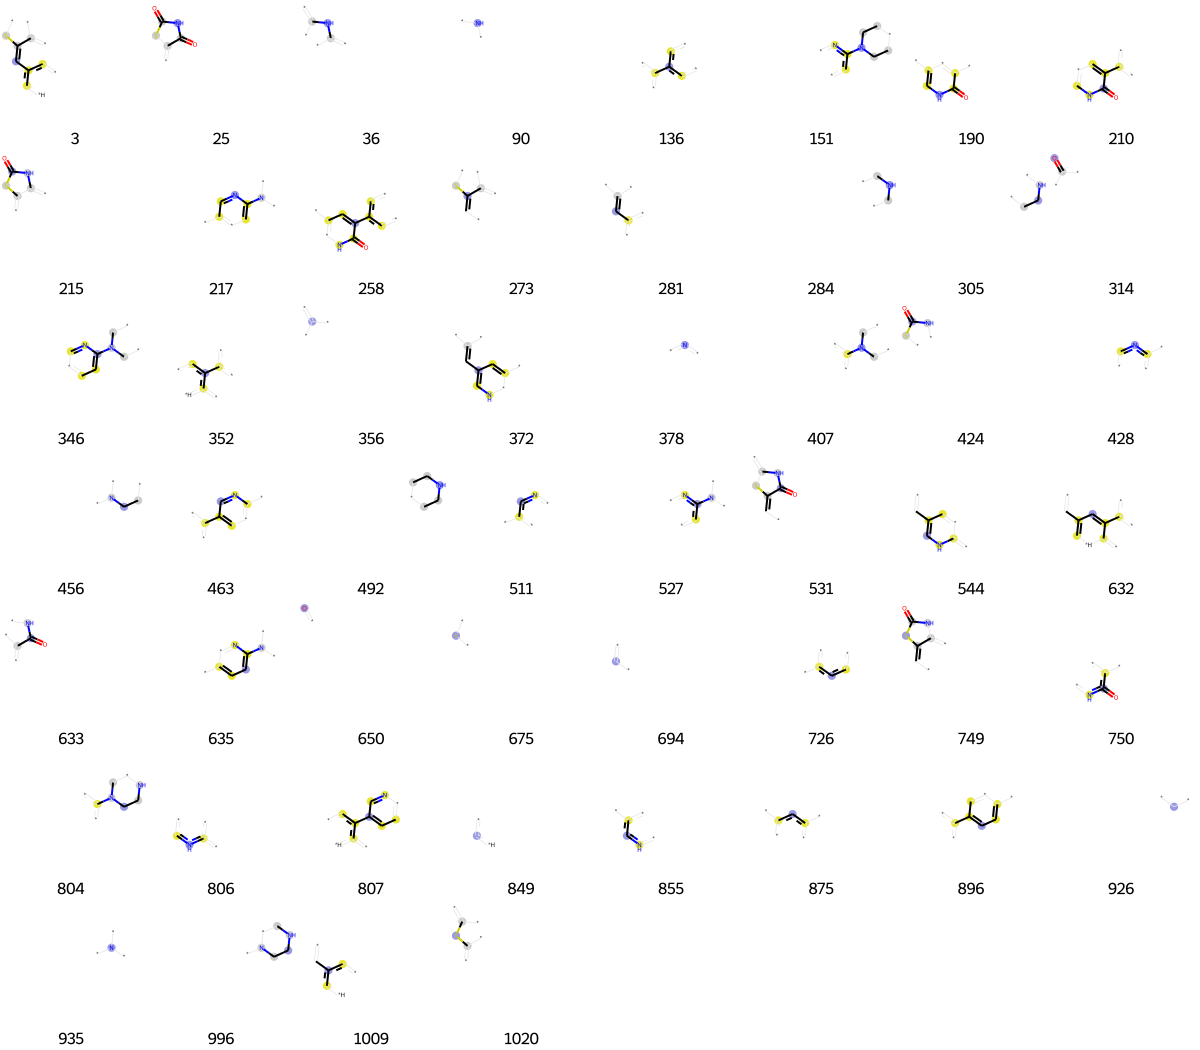

In [5641]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])